# Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout, Input, Flatten, Concatenate, Add

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from tensorflow.keras.optimizers import Adam

## Final Data Prepare

In [ ]:
same_df = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/real_fin_fin_data/same_final.csv')
int_df = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/real_fin_fin_data/int_final.csv')

In [ ]:
same_df['Date'] = pd.to_datetime(same_df['Date'])
int_df['Date'] = pd.to_datetime(int_df['Date'])

In [ ]:
boolean_columns = [
    "Covid19",
    "US_President_Republican",
    "US_President_Democratic",
    "KR_President_Democratic",
    "KR_President_Conservative",
    "KR_President_Neutral"
]

same_df[boolean_columns] = same_df[boolean_columns].astype(bool)
int_df[boolean_columns] = int_df[boolean_columns].astype(bool)

# Set Index
same_df.set_index('Date', inplace = True)
int_df.set_index('Date', inplace = True)

# Normalization
features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican', 'US_President_Democratic', 'KR_President_Democratic', 'KR_President_Conservative', 'KR_President_Neutral',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']
target = ['Close']

x_train_same = same_df[features][:3518].values
y_train_same = same_df[target][:3518].values

x_val_same = same_df[features][3518:4691].values
y_val_same = same_df[target][3518:4691].values

x_test_same = same_df[features][4691:].values
y_test_same = same_df[target][4691:].values

x_scaler_same_df, y_scaler_same_df = MinMaxScaler(), MinMaxScaler()

x_train_same = x_scaler_same_df.fit_transform(x_train_same)
y_train_same = y_scaler_same_df.fit_transform(y_train_same.reshape(-1, 1))

x_val_same = x_scaler_same_df.transform(x_val_same)
y_val_same = y_scaler_same_df.transform(y_val_same.reshape(-1, 1))

x_test_same = x_scaler_same_df.transform(x_test_same)
y_test_same = y_scaler_same_df.transform(y_test_same.reshape(-1, 1))

In [ ]:
x_train_int = int_df[features][:3518].values
y_train_int = int_df[target][:3518].values

x_val_int = int_df[features][3518:4691].values
y_val_int = int_df[target][3518:4691].values

x_test_int = int_df[features][4691:].values
y_test_int = int_df[target][4691:].values

x_scaler_int_df, y_scaler_int_df = MinMaxScaler(), MinMaxScaler()

x_train_int = x_scaler_int_df.fit_transform(x_train_int)
y_train_int = y_scaler_int_df.fit_transform(y_train_int.reshape(-1, 1))

x_val_int = x_scaler_int_df.transform(x_val_int)
y_val_int = y_scaler_int_df.transform(y_val_int.reshape(-1, 1))

x_test_int = x_scaler_int_df.transform(x_test_int)
y_test_int = y_scaler_int_df.transform(y_test_int.reshape(-1, 1))

### Feature Selection

In [ ]:
features0_same = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','US_10',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1']

features0_int = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction', 'US_10', 'SOX_Close',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_60', 'Lag_90']

In [ ]:
len(features0_int)

17

In [ ]:
selected_x_train_same = same_df[features0_same][:3518].values
selected_y_train_same = same_df[target][:3518].values

selected_x_val_same = same_df[features0_same][3518:4691].values
selected_y_val_same = same_df[target][3518:4691].values

selected_x_test_same = same_df[features0_same][4691:].values
selected_y_test_same = same_df[target][4691:].values

x_scaler_selected_same_df, y_scaler_selected_same_df = MinMaxScaler(), MinMaxScaler()

selected_x_train_same = x_scaler_selected_same_df.fit_transform(selected_x_train_same)
selected_y_train_same = y_scaler_selected_same_df.fit_transform(selected_y_train_same.reshape(-1, 1))

selected_x_val_same = x_scaler_selected_same_df.transform(selected_x_val_same)
selected_y_val_same = y_scaler_selected_same_df.transform(selected_y_val_same.reshape(-1, 1))

selected_x_test_same = x_scaler_selected_same_df.transform(selected_x_test_same)
selected_y_test_same = y_scaler_selected_same_df.transform(selected_y_test_same.reshape(-1, 1))

In [ ]:
selected_x_train_int = int_df[features0_int][:3518].values
selected_y_train_int = int_df[target][:3518].values

selected_x_val_int = int_df[features0_int][3518:4691].values
selected_y_val_int = int_df[target][3518:4691].values

selected_x_test_int = int_df[features0_int][4691:].values
selected_y_test_int = int_df[target][4691:].values

x_scaler_selected_int_df, y_scaler_selected_int_df = MinMaxScaler(), MinMaxScaler()

selected_x_train_int = x_scaler_selected_int_df.fit_transform(selected_x_train_int)
selected_y_train_int = y_scaler_selected_int_df.fit_transform(selected_y_train_int.reshape(-1, 1))

selected_x_val_int = x_scaler_selected_int_df.transform(selected_x_val_int)
selected_y_val_int = y_scaler_selected_int_df.transform(selected_y_val_int.reshape(-1, 1))

selected_x_test_int = x_scaler_selected_int_df.transform(selected_x_test_int)
selected_y_test_int = y_scaler_selected_int_df.transform(selected_y_test_int.reshape(-1, 1))

In [ ]:
selected_x_train_int.shape

(3518, 17)

In [ ]:
print(x_scaler_selected_int_df.n_features_in_)

17


## Without Outlier Data Prepare

In [ ]:
same_wo = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/real_fin_fin_data/same_no_outlier.csv')
int_wo = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/real_fin_fin_data/int_no_outlier.csv')

In [ ]:
boolean_columns = [
    "Covid19",
    "US_President_Republican",
    "US_President_Democratic",
    "KR_President_Democratic",
    "KR_President_Conservative",
    "KR_President_Neutral"
]

same_wo[boolean_columns] = same_wo[boolean_columns].astype(bool)
int_wo[boolean_columns] = int_wo[boolean_columns].astype(bool)

# Set Index
same_wo.set_index('Date', inplace = True)
int_wo.set_index('Date', inplace = True)

# Normalization
features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican', 'US_President_Democratic', 'KR_President_Democratic', 'KR_President_Conservative', 'KR_President_Neutral',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']
target = ['Close']

x_train_same_wo = same_wo[features][:3518].values
y_train_same_wo = same_wo[target][:3518].values

x_val_same_wo = same_wo[features][3518:4691].values
y_val_same_wo = same_wo[target][3518:4691].values

x_test_same_wo = same_wo[features][4691:].values
y_test_same_wo = same_wo[target][4691:].values

x_scaler_same_wo, y_scaler_same_wo = MinMaxScaler(), MinMaxScaler()

x_train_same_wo = x_scaler_same_wo.fit_transform(x_train_same_wo)
y_train_same_wo = y_scaler_same_wo.fit_transform(y_train_same_wo.reshape(-1, 1))

x_val_same_wo = x_scaler_same_wo.transform(x_val_same_wo)
y_val_same_wo = y_scaler_same_wo.transform(y_val_same_wo.reshape(-1, 1))

x_test_same_wo = x_scaler_same_wo.transform(x_test_same_wo)
y_test_same_wo = y_scaler_same_wo.transform(y_test_same_wo.reshape(-1, 1))

In [ ]:
x_train_int_wo = int_wo[features][:3518].values
y_train_int_wo = int_wo[target][:3518].values

x_val_int_wo = int_wo[features][3518:4691].values
y_val_int_wo = int_wo[target][3518:4691].values

x_test_int_wo = int_wo[features][4691:].values
y_test_int_wo = int_wo[target][4691:].values

x_scaler_int_wo, y_scaler_int_wo = MinMaxScaler(), MinMaxScaler()

x_train_int_wo = x_scaler_int_wo.fit_transform(x_train_int_wo)
y_train_int_wo = y_scaler_int_wo.fit_transform(y_train_int_wo.reshape(-1, 1))

x_val_int_wo = x_scaler_int_wo.transform(x_val_int_wo)
y_val_int_wo = y_scaler_int_wo.transform(y_val_int_wo.reshape(-1, 1))

x_test_int_wo = x_scaler_int_wo.transform(x_test_int_wo)
y_test_int_wo = y_scaler_int_wo.transform(y_test_int_wo.reshape(-1, 1))

### Feature Selection

In [ ]:
features2_same = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction', 'WTI', 'Exchange', 'SOX_Close',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30']

features2_int = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction', 'SOX_Close',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1']

In [ ]:
selected_x_train_same_wo = same_wo[features2_same][:3518].values
selected_y_train_same_wo = same_wo[target][:3518].values

selected_x_val_same_wo = same_wo[features2_same][3518:4691].values
selected_y_val_same_wo = same_wo[target][3518:4691].values

selected_x_test_same_wo = same_wo[features2_same][4691:].values
selected_y_test_same_wo = same_wo[target][4691:].values

x_scaler_selected_same_wo, y_scaler_selected_same_wo = MinMaxScaler(), MinMaxScaler()

selected_x_train_same_wo = x_scaler_selected_same_wo.fit_transform(selected_x_train_same_wo)
selected_y_train_same_wo = y_scaler_selected_same_wo.fit_transform(selected_y_train_same_wo.reshape(-1, 1))

selected_x_val_same_wo = x_scaler_selected_same_wo.transform(selected_x_val_same_wo)
selected_y_val_same_wo = y_scaler_selected_same_wo.transform(selected_y_val_same_wo.reshape(-1, 1))

selected_x_test_same_wo = x_scaler_selected_same_wo.transform(selected_x_test_same_wo)
selected_y_test_same_wo = y_scaler_selected_same_wo.transform(selected_y_test_same_wo.reshape(-1, 1))

In [ ]:
selected_x_train_int_wo = int_wo[features2_int][:3518].values
selected_y_train_int_wo = int_wo[target][:3518].values

selected_x_val_int_wo = int_wo[features2_int][3518:4691].values
selected_y_val_int_wo = int_wo[target][3518:4691].values

selected_x_test_int_wo = int_wo[features2_int][4691:].values
selected_y_test_int_wo = int_wo[target][4691:].values

x_scaler_selected_int_wo, y_scaler_selected_int_wo = MinMaxScaler(), MinMaxScaler()

selected_x_train_int_wo = x_scaler_selected_int_wo.fit_transform(selected_x_train_int_wo)
selected_y_train_int_wo = y_scaler_selected_int_wo.fit_transform(selected_y_train_int_wo.reshape(-1, 1))

selected_x_val_int_wo = x_scaler_selected_int_wo.transform(selected_x_val_int_wo)
selected_y_val_int_wo = y_scaler_selected_int_wo.transform(selected_y_val_int_wo.reshape(-1, 1))

selected_x_test_int_wo = x_scaler_selected_int_wo.transform(selected_x_test_int_wo)
selected_y_test_int_wo = y_scaler_selected_int_wo.transform(selected_y_test_int_wo.reshape(-1, 1))

## No outlier scaling

In [ ]:
same_wo_scaling = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/real_fin_fin_data/same_no_outlier_scaling.csv')
int_wo_scaling = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/real_fin_fin_data/int_no_outlier_scaling.csv')

In [ ]:
boolean_columns = [
    "Covid19",
    "US_President_Republican",
    "US_President_Democratic",
    "KR_President_Democratic",
    "KR_President_Conservative",
    "KR_President_Neutral"
]

same_wo_scaling[boolean_columns] = same_wo_scaling[boolean_columns].astype(bool)
int_wo_scaling[boolean_columns] = int_wo_scaling[boolean_columns].astype(bool)

# Set Index
same_wo_scaling.set_index('Date', inplace = True)
int_wo_scaling.set_index('Date', inplace = True)

# Normalization
features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican', 'US_President_Democratic', 'KR_President_Democratic', 'KR_President_Conservative', 'KR_President_Neutral',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']
target = ['Close']

x_train_same_wo_scaling = same_wo_scaling[features][:3518].values
y_train_same_wo_scaling = same_wo_scaling[target][:3518].values

x_val_same_wo_scaling = same_wo_scaling[features][3518:4691].values
y_val_same_wo_scaling = same_wo_scaling[target][3518:4691].values

x_test_same_wo_scaling = same_wo_scaling[features][4691:].values
y_test_same_wo_scaling = same_wo_scaling[target][4691:].values

x_scaler_same_wo_scaling, y_scaler_same_wo_scaling = MinMaxScaler(), MinMaxScaler()

x_train_same_wo_scaling = x_scaler_same_wo_scaling.fit_transform(x_train_same_wo_scaling)
y_train_same_wo_scaling = y_scaler_same_wo_scaling.fit_transform(y_train_same_wo_scaling.reshape(-1, 1))

x_val_same_wo_scaling = x_scaler_same_wo_scaling.transform(x_val_same_wo_scaling)
y_val_same_wo_scaling = y_scaler_same_wo_scaling.transform(y_val_same_wo_scaling.reshape(-1, 1))

x_test_same_wo_scaling = x_scaler_same_wo_scaling.transform(x_test_same_wo_scaling)
y_test_same_wo_scaling = y_scaler_same_wo_scaling.transform(y_test_same_wo_scaling.reshape(-1, 1))

In [ ]:
x_train_int_wo_scaling = int_wo_scaling[features][:3518].values
y_train_int_wo_scaling = int_wo_scaling[target][:3518].values

x_val_int_wo_scaling = int_wo_scaling[features][3518:4691].values
y_val_int_wo_scaling = int_wo_scaling[target][3518:4691].values

x_test_int_wo_scaling = int_wo_scaling[features][4691:].values
y_test_int_wo_scaling = int_wo_scaling[target][4691:].values

x_scaler_int_wo_scaling, y_scaler_int_wo_scaling = MinMaxScaler(), MinMaxScaler()

x_train_int_wo_scaling = x_scaler_int_wo_scaling.fit_transform(x_train_int_wo_scaling)
y_train_int_wo_scaling = y_scaler_int_wo_scaling.fit_transform(y_train_int_wo_scaling.reshape(-1, 1))

x_val_int_wo_scaling = x_scaler_int_wo_scaling.transform(x_val_int_wo_scaling)
y_val_int_wo_scaling = y_scaler_int_wo_scaling.transform(y_val_int_wo_scaling.reshape(-1, 1))

x_test_int_wo_scaling = x_scaler_int_wo_scaling.transform(x_test_int_wo_scaling)
y_test_int_wo_scaling = y_scaler_int_wo_scaling.transform(y_test_int_wo_scaling.reshape(-1, 1))

In [ ]:
features4_same = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Foreign','US_10', 'Exchange',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_90']

features4_int = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'SOX_Close',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1']

In [ ]:
selected_x_train_same_wo_scaling = same_wo_scaling[features4_same][:3518].values
selected_y_train_same_wo_scaling = same_wo_scaling[target][:3518].values

selected_x_val_same_wo_scaling = same_wo_scaling[features4_same][3518:4691].values
selected_y_val_same_wo_scaling = same_wo_scaling[target][3518:4691].values

selected_x_test_same_wo_scaling = same_wo[features4_same][4691:].values
selected_y_test_same_wo_scaling = same_wo[target][4691:].values

x_scaler_selected_same_wo_scaling, y_scaler_selected_same_wo_scaling = MinMaxScaler(), MinMaxScaler()

selected_x_train_same_wo_scaling = x_scaler_selected_same_wo_scaling.fit_transform(selected_x_train_same_wo_scaling)
selected_y_train_same_wo_scaling = y_scaler_selected_same_wo_scaling.fit_transform(selected_y_train_same_wo_scaling.reshape(-1, 1))

selected_x_val_same_wo_scaling = x_scaler_selected_same_wo_scaling.transform(selected_x_val_same_wo_scaling)
selected_y_val_same_wo_scaling = y_scaler_selected_same_wo_scaling.transform(selected_y_val_same_wo_scaling.reshape(-1, 1))

selected_x_test_same_wo_scaling = x_scaler_selected_same_wo_scaling.transform(selected_x_test_same_wo_scaling)
selected_y_test_same_wo_scaling = y_scaler_selected_same_wo_scaling.transform(selected_y_test_same_wo_scaling.reshape(-1, 1))

In [ ]:
selected_x_train_int_wo_scaling = int_wo_scaling[features4_int][:3518].values
selected_y_train_int_wo_scaling = int_wo_scaling[target][:3518].values

selected_x_val_int_wo_scaling = int_wo_scaling[features4_int][3518:4691].values
selected_y_val_int_wo_scaling = int_wo_scaling[target][3518:4691].values

selected_x_test_int_wo_scaling = int_wo_scaling[features4_int][4691:].values
selected_y_test_int_wo_scaling = int_wo_scaling[target][4691:].values

x_scaler_selected_int_wo_scaling, y_scaler_selected_int_wo_scaling = MinMaxScaler(), MinMaxScaler()

selected_x_train_int_wo_scaling = x_scaler_selected_int_wo_scaling.fit_transform(selected_x_train_int_wo_scaling)
selected_y_train_int_wo_scaling = y_scaler_selected_int_wo_scaling.fit_transform(selected_y_train_int_wo_scaling.reshape(-1, 1))

selected_x_val_int_wo_scaling = x_scaler_selected_int_wo_scaling.transform(selected_x_val_int_wo_scaling)
selected_y_val_int_wo_scaling = y_scaler_selected_int_wo_scaling.transform(selected_y_val_int_wo_scaling.reshape(-1, 1))

selected_x_test_int_wo_scaling = x_scaler_selected_int_wo_scaling.transform(selected_x_test_int_wo_scaling)
selected_y_test_int_wo_scaling = y_scaler_selected_int_wo_scaling.transform(selected_y_test_int_wo_scaling.reshape(-1, 1))

# Model Setting

In [ ]:
!pip install wandb -qU

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 63.0 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

In [ ]:
import wandb
from wandb.integration.keras import WandbCallback

In [ ]:
wandb.login(key='b0f579d1228ea5f3cfac162435df78243cadca62')

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: yebin. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("GPU is set to be used.")
    except RuntimeError as e:
        print(f"Error setting GPU memory growth: {e}")
else:
    print("No GPU found. Using CPU instead.")

GPU is set to be used.


In [ ]:
def create_sequences(X, y, time_steps):
    sequences, labels = [], []
    for i in range(len(X) - time_steps):
        sequences.append(X[i:i+time_steps])
        labels.append(y[i+time_steps])
    return np.array(sequences), np.array(labels)

def rmse_metric(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], input_shape[-1]),
                                 initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='attention_bias', shape=(input_shape[-1],),
                                 initializer='zeros', trainable=True)
        self.V = self.add_weight(name='attention_score', shape=(input_shape[-1], 1),
                                 initializer='random_normal', trainable=True)

    def call(self, inputs):
        # Attention mechanism
        score = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
        attention_weights = tf.nn.softmax(tf.tensordot(score, self.V, axes=1), axis=1)
        context_vector = attention_weights * inputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector

In [ ]:
class MultiHeadAttentionLayer(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dim):
        super(MultiHeadAttentionLayer, self).__init__()
        self.attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)

    def call(self, query, value):
        return self.attention(query=query, value=value, key=value)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터할 지표 (예: 'val_loss' 또는 'val_rmse')
    patience=5,          # 성능 향상이 없는 epoch 수 (5번 동안 개선 없으면 중단)
    restore_best_weights=True,  # 가장 성능이 좋은 가중치를 복원
    mode = 'min'
    #verbose=1            # 로그 출력 여부
)

# Before Outlier

## Same

##### Init

In [ ]:
wandb.init(project="LSTM No Out - Same", name="initial", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/noOut_same_init.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_same_wo, y_train_same_wo, time_steps)
X_val, y_val = create_sequences(x_val_same_wo, y_val_same_wo, time_steps)

model_same_init = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True), # 여기 feature 바꾸는거 잊지 말기.
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),
    tf.keras.layers.Dense(1)
])

model_same_init.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_same_init.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_same_init.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0262 - mse: 0.0262 - val_loss: 0.8057 - val_mse: 0.8057
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.5927e-04 - mse: 5.5927e-04 - val_loss: 0.7599 - val_mse: 0.7599
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 4.8562e-04 - mse: 4.8562e-04 - val_loss: 0.7218 - val_mse: 0.7218
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.2039e-04 - mse: 4.2039e-04 - val_loss: 0.7001 - val_mse: 0.7001
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.9110e-04 - mse: 3.9110e-04 - val_loss: 0.6909 - val_mse: 0.6909
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 2.8491e-04 - mse: 2.8491e-04 - val_loss: 0.6759 - val_mse: 0.6759
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.4437e-04 - mse: 3.4437e-04 - val_loss: 0.6754 - val_mse: 0.6754
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.5420e-04 - mse: 3.5420e-04 - val_loss: 0.6472 - val_mse:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 90, 64)              │          28,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,749 (717.77 KB)

 Trainable params: 61,249 (239.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 122,500 (478.52 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


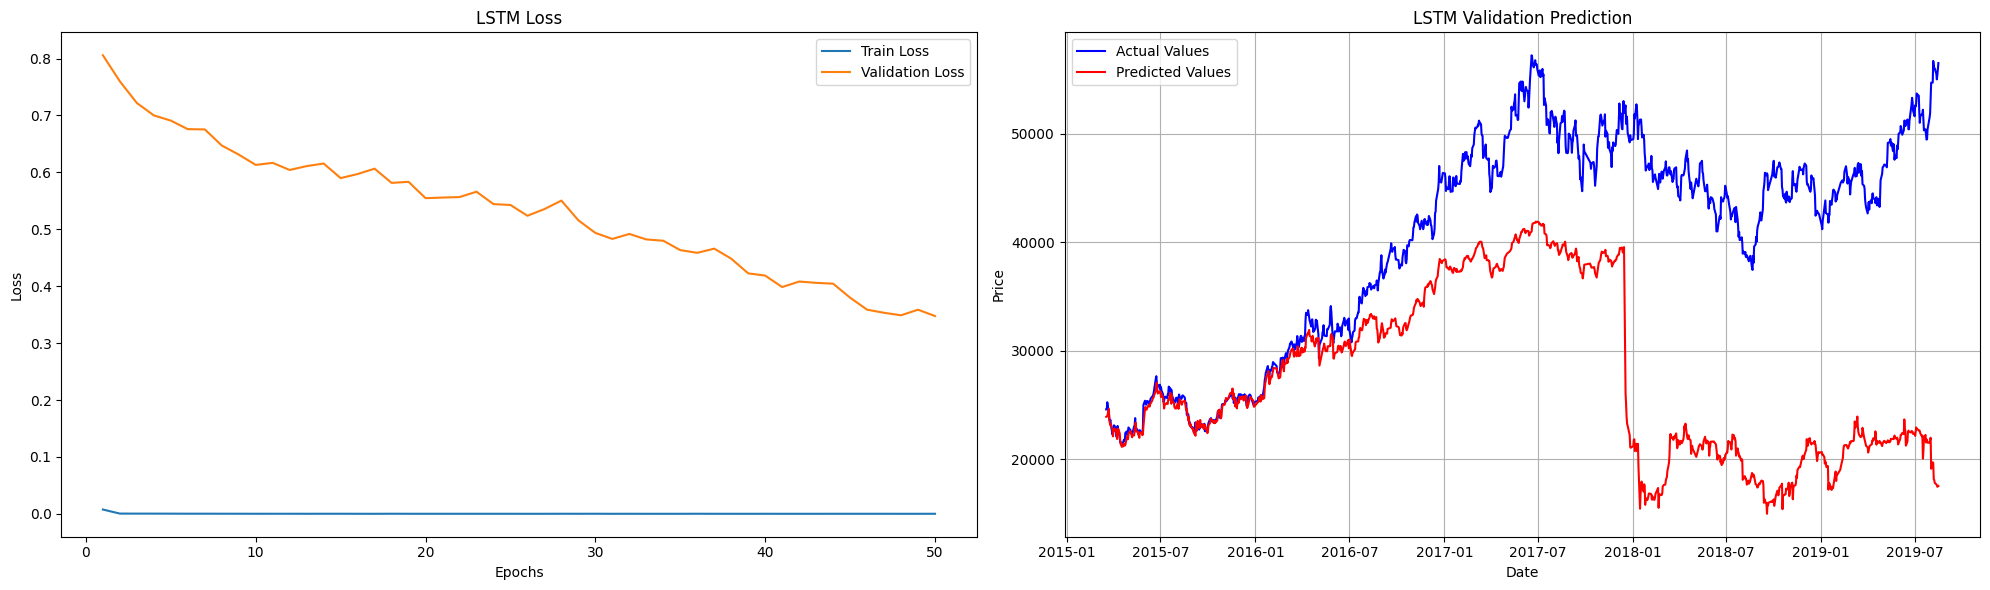

In [ ]:
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(x_val_same_wo, y_val_same_wo, time_steps) # 여기 val same, int 바꾸기

y_pred = model_same_init.predict(X_val) # 여기 모델 이름 바꾸기
a,b = y_val, y_pred
y_pred = y_scaler_same_wo.inverse_transform(y_pred) # 여기 scaler 바꾸기

y_val = y_scaler_same_wo.inverse_transform(y_val) # 여기 scaler 바꾸기

plt.subplot(1,2,2)
plt.plot(same_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(same_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

Before Inverse Scaling
MAE: 12841.1202
MSE: 286670276.3053
RMSE: 16931.3401
R²: -1.9137
--------------------
After Inverse Scaling
MAE: 0.4471
MSE: 0.3475
RMSE: 0.5895
R²: -1.9137


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


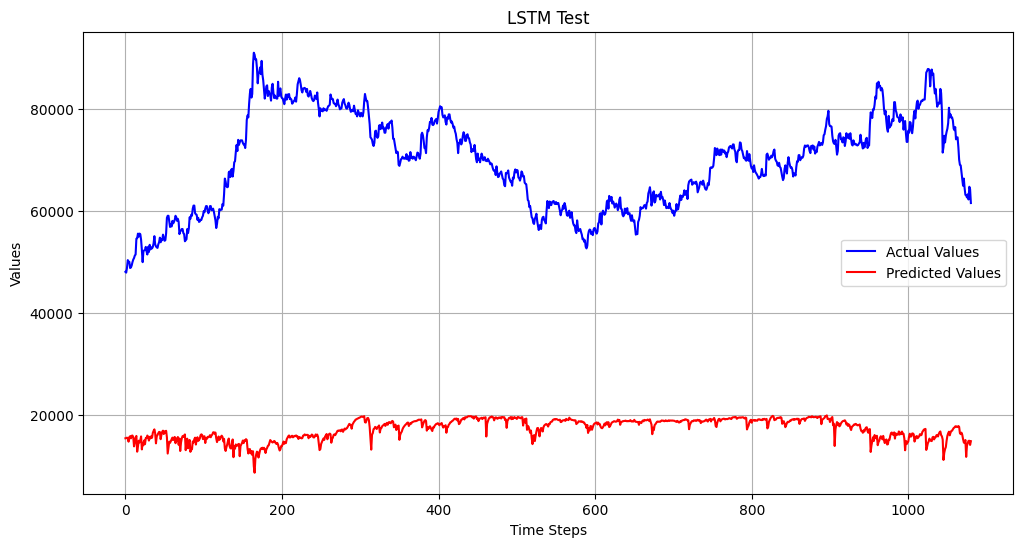

In [ ]:
X_test, y_test = create_sequences(x_test_same_wo, y_test_same_wo, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_same_init.predict(X_test) # 모델 이름 바꾸기
y_pred = y_scaler_same_wo.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_same_wo.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### Hyper1

In [ ]:
wandb.init(project="LSTM No Out - Same", name="Hyepr1", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [128, 64],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/noOut_same_hyper1.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_same_wo, y_train_same_wo, time_steps)
X_val, y_val = create_sequences(x_val_same_wo, y_val_same_wo, time_steps)

model_same_hyper1 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True), # 여기 feature 바꾸는거 잊지 말기.
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

model_same_hyper1.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_same_hyper1.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_same_hyper1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.6837 - val_mse: 0.6837
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 6.5476e-04 - mse: 6.5476e-04 - val_loss: 0.6533 - val_mse: 0.6533
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 6.5346e-04 - mse: 6.5346e-04 - val_loss: 0.6229 - val_mse: 0.6229
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 6.2644e-04 - mse: 6.2644e-04 - val_loss: 0.5925 - val_mse: 0.5925
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.1723e-04 - mse: 4.1723e-04 - val_loss: 0.6030 - val_mse: 0.6030
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 5.3431e-04 - mse: 5.3431e-04 - val_loss: 0.6085 - val_mse: 0.6085
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 4.5183e-04 - mse: 4.5183e-04 - val_loss: 0.5630 - val_mse: 0.5630
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 4.5162e-04 - mse: 4.5162e-04 - val_loss: 0.5342 - val_mse:

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 90, 128)             │          89,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 90, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 527,237 (2.01 MB)

 Trainable params: 175,745 (686.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 351,492 (1.34 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


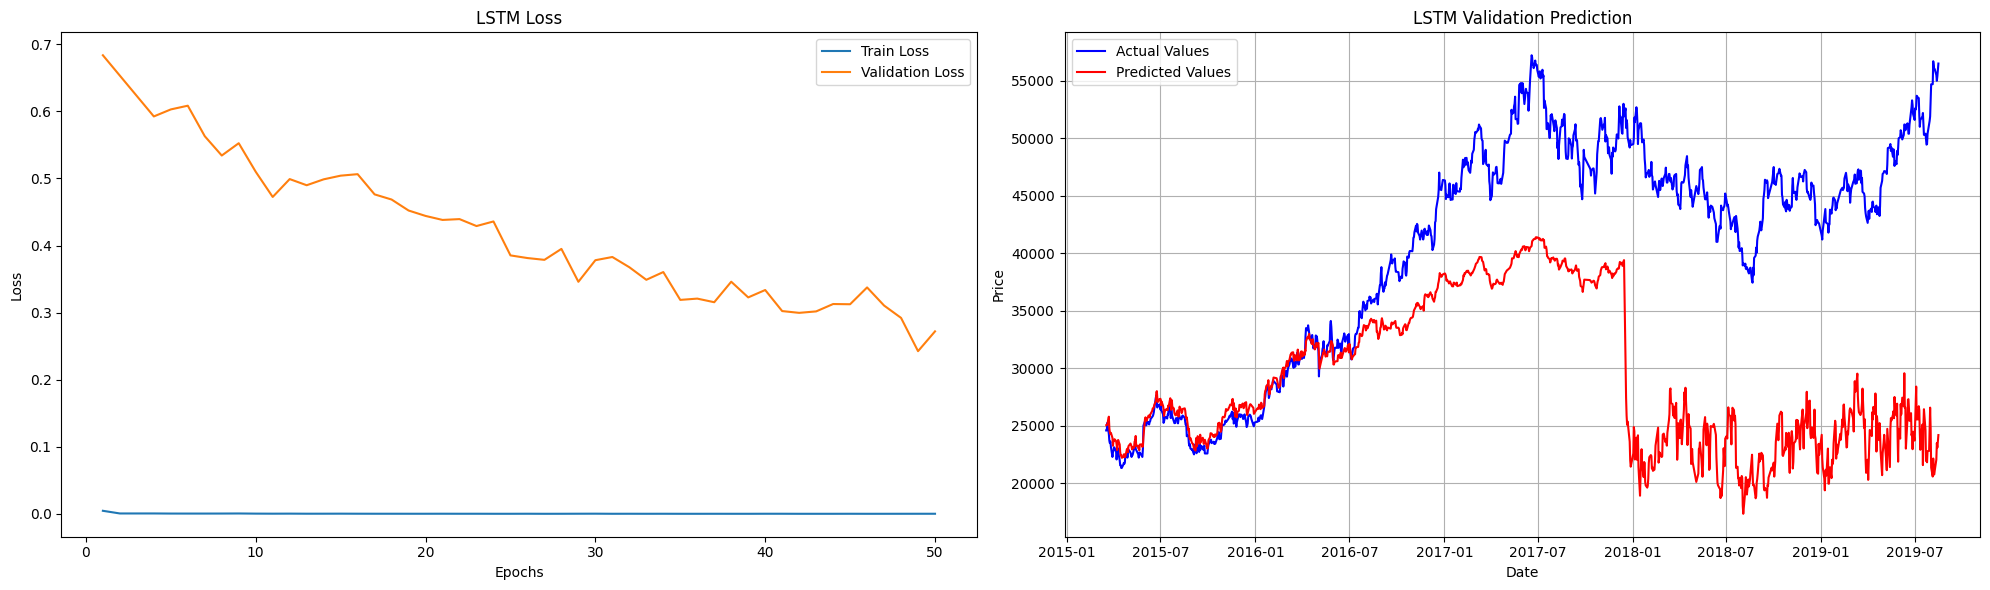

In [ ]:
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(x_val_same_wo, y_val_same_wo, time_steps) # 여기 val same, int 바꾸기

y_pred = model_same_hyper1.predict(X_val) # 여기 모델 이름 바꾸기
a,b = y_val, y_pred
y_pred = y_scaler_same_wo.inverse_transform(y_pred) # 여기 scaler 바꾸기

y_val = y_scaler_same_wo.inverse_transform(y_val) # 여기 scaler 바꾸기

plt.subplot(1,2,2)
plt.plot(same_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(same_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

Before Inverse Scaling
MAE: 11503.5419
MSE: 224433182.1898
RMSE: 14981.0942
R²: -1.2811
--------------------
After Inverse Scaling
MAE: 0.4005
MSE: 0.2721
RMSE: 0.5216
R²: -1.2811


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


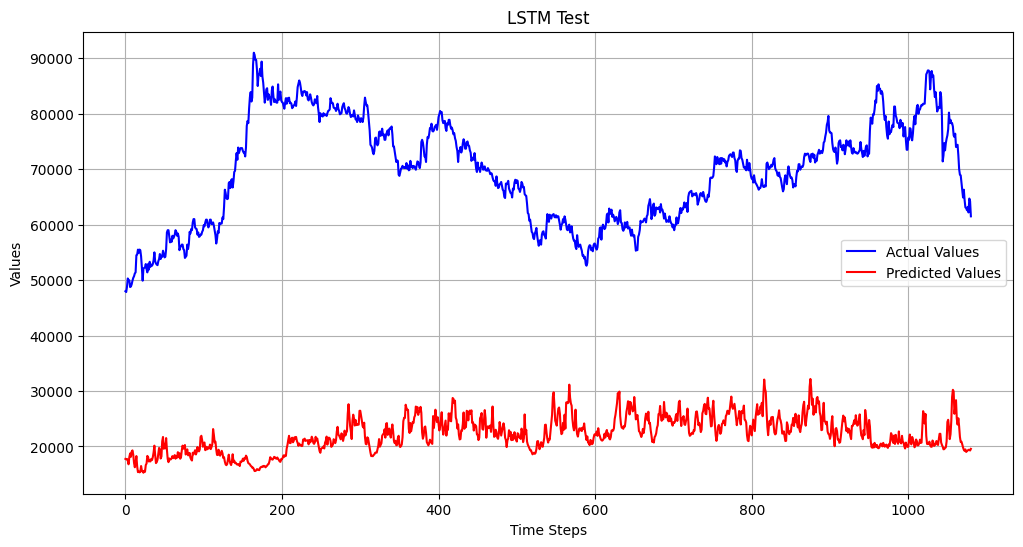

In [ ]:
X_test, y_test = create_sequences(x_test_same_wo, y_test_same_wo, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_same_hyper1.predict(X_test) # 모델 이름 바꾸기
y_pred = y_scaler_same_wo.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_same_wo.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

## Int

##### init

In [ ]:
wandb.finish()

In [ ]:
wandb.init(project="LSTM No Out - Int", name="initial", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/noOut_Int_init.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_int_wo, y_train_int_wo, time_steps)
X_val, y_val = create_sequences(x_val_int_wo, y_val_int_wo, time_steps)

model_int_init = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True), # 여기 feature 바꾸는거 잊지 말기.
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),
    tf.keras.layers.Dense(1)
])

model_int_init.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_init.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_int_init.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0476 - mse: 0.0476 - val_loss: 0.8199 - val_mse: 0.8199
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.5953e-04 - mse: 5.5953e-04 - val_loss: 0.7944 - val_mse: 0.7944
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.0771e-04 - mse: 4.0771e-04 - val_loss: 0.7697 - val_mse: 0.7697
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.8017e-04 - mse: 3.8017e-04 - val_loss: 0.7401 - val_mse: 0.7401
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3.6218e-04 - mse: 3.6218e-04 - val_loss: 0.7358 - val_mse: 0.7358
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 3.4409e-04 - mse: 3.4409e-04 - val_loss: 0.7149 - val_mse: 0.7149
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 3.6331e-04 - mse: 3.6331e-04 - val_loss: 0.6967 - val_mse: 0.6967
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 3.0921e-04 - mse: 3.0921e-04 - val_loss: 0.6959 - val_mse:

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 90, 64)              │          28,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,749 (717.77 KB)

 Trainable params: 61,249 (239.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 122,500 (478.52 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


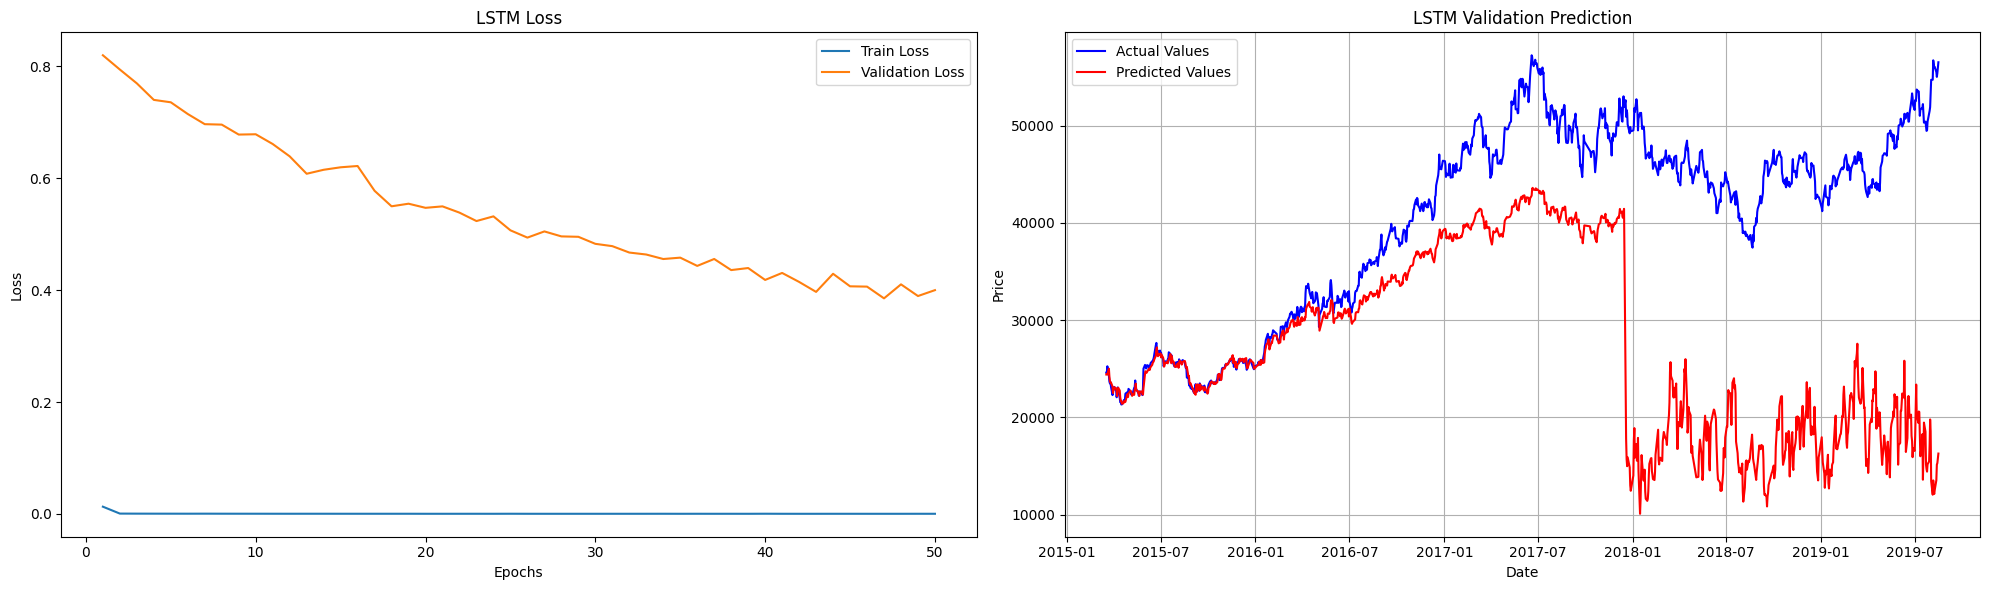

In [ ]:
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(x_val_int_wo, y_val_int_wo, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_init.predict(X_val) # 여기 모델 이름 바꾸기
a,b = y_val, y_pred
y_pred = y_scaler_int_wo.inverse_transform(y_pred) # 여기 scaler 바꾸기

y_val = y_scaler_int_wo.inverse_transform(y_val) # 여기 scaler 바꾸기

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

Before Inverse Scaling
MAE: 13257.1987
MSE: 329933406.6322
RMSE: 18164.0691
R²: -2.3534
--------------------
After Inverse Scaling
MAE: 0.4616
MSE: 0.4000
RMSE: 0.6325
R²: -2.3534


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


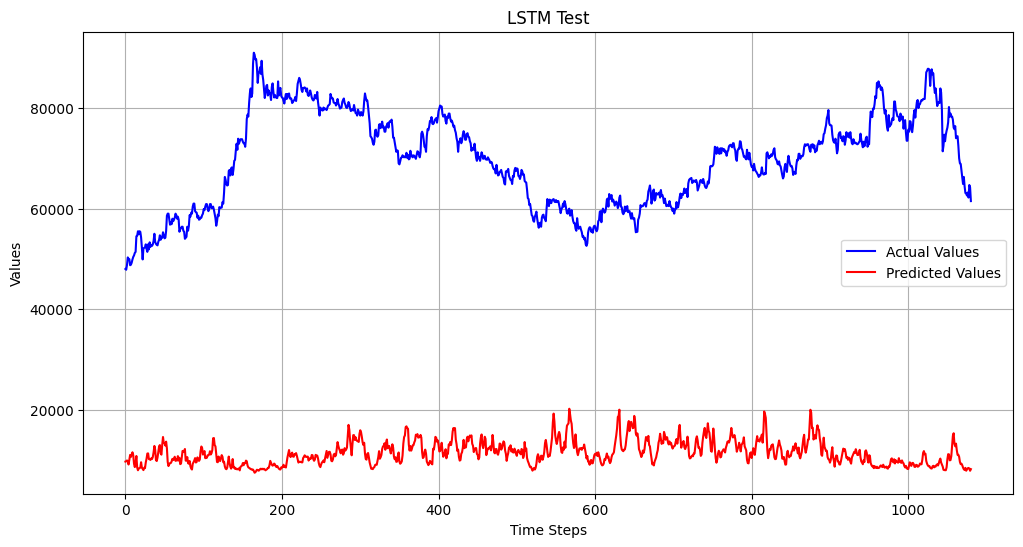

In [ ]:
X_test, y_test = create_sequences(x_test_int_wo, y_test_int_wo, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_init.predict(X_test) # 모델 이름 바꾸기
y_pred = y_scaler_int_wo.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_int_wo.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### Hyper1

In [ ]:
wandb.init(project="LSTM No Out - Int", name="initial", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [128, 64],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/noOut_Int_hyper1.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_int_wo, y_train_int_wo, time_steps)
X_val, y_val = create_sequences(x_val_int_wo, y_val_int_wo, time_steps)

model_int_hyper1 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True), # 여기 feature 바꾸는거 잊지 말기.
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

optimizer = Adam(learning_rate=0.0005)
model_int_hyper1.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper1.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_int_hyper1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0339 - mse: 0.0339 - val_loss: 0.4244 - val_mse: 0.4244
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.6269e-04 - mse: 5.6269e-04 - val_loss: 0.4043 - val_mse: 0.4043
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.4105e-04 - mse: 4.4105e-04 - val_loss: 0.4067 - val_mse: 0.4067
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.9387e-04 - mse: 3.9387e-04 - val_loss: 0.3908 - val_mse: 0.3908
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.7011e-04 - mse: 3.7011e-04 - val_loss: 0.3926 - val_mse: 0.3926
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.2099e-04 - mse: 3.2099e-04 - val_loss: 0.3845 - val_mse: 0.3845
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.1100e-04 - mse: 3.1100e-04 - val_loss: 0.3611 - val_mse: 0.3611
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.4251e-04 - mse: 3.4251e-04 - val_loss: 0.3664 - val_mse:

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 90, 128)             │          89,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 428,165 (1.63 MB)

 Trainable params: 142,721 (557.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 285,444 (1.09 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


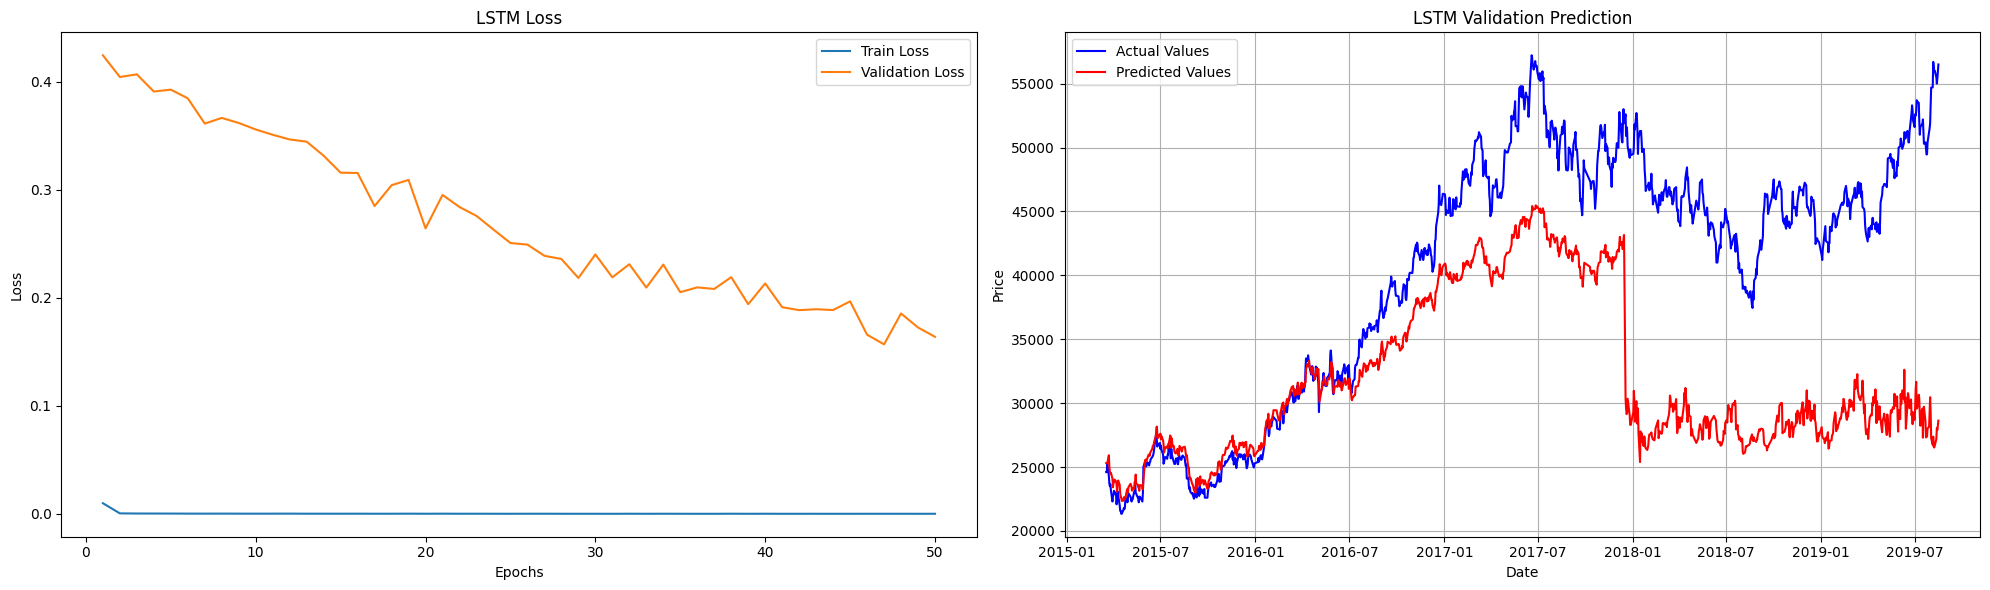

In [ ]:
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(x_val_int_wo, y_val_int_wo, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper1.predict(X_val) # 여기 모델 이름 바꾸기
a,b = y_val, y_pred
y_pred = y_scaler_int_wo.inverse_transform(y_pred) # 여기 scaler 바꾸기

y_val = y_scaler_int_wo.inverse_transform(y_val) # 여기 scaler 바꾸기

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

Before Inverse Scaling
MAE: 8877.9633
MSE: 135159902.8523
RMSE: 11625.8291
R²: -0.3737
--------------------
After Inverse Scaling
MAE: 0.3091
MSE: 0.1639
RMSE: 0.4048
R²: -0.3737


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


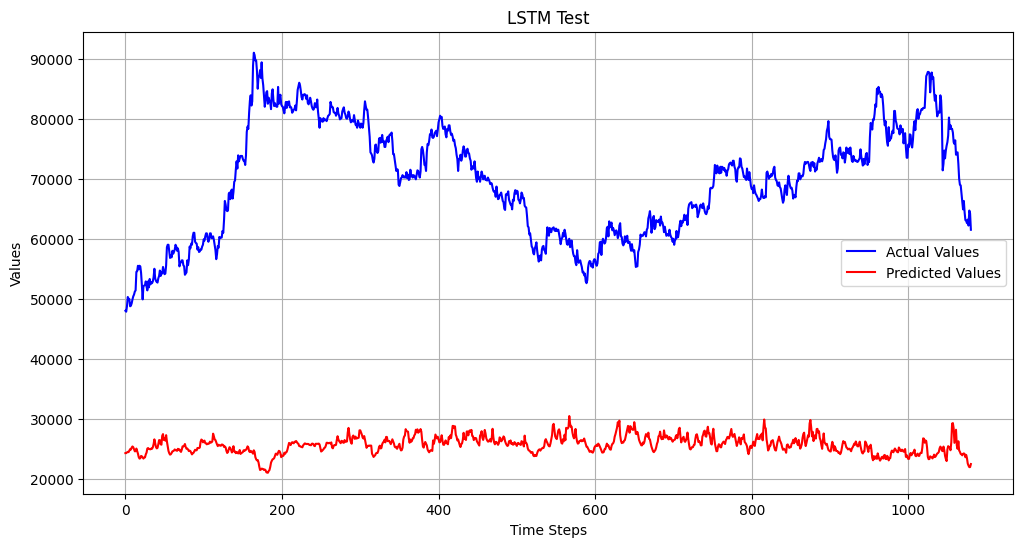

In [ ]:
X_test, y_test = create_sequences(x_test_int_wo, y_test_int_wo, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper1.predict(X_test) # 모델 이름 바꾸기
y_pred = y_scaler_int_wo.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_int_wo.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

#### Feature Selection

##### 2

In [ ]:
wandb.finish()

In [ ]:
wandb.init(project="LSTM No Out - Int", name="hyper2", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [128, 64],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/noOut_Int_hyper2.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int_wo, selected_y_train_int_wo, time_steps)
X_val, y_val = create_sequences(selected_x_val_int_wo, selected_y_val_int_wo, time_steps)

model_int_hyper2 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features2_int)), return_sequences=True), # 여기 feature 바꾸는거 잊지 말기.
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

optimizer = Adam(learning_rate=0.0005)
model_int_hyper2.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper2.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_int_hyper2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0275 - mse: 0.0275 - val_loss: 2.1778 - val_mse: 2.1778
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.2229e-04 - mse: 5.2229e-04 - val_loss: 2.0094 - val_mse: 2.0094
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.0472e-04 - mse: 4.0472e-04 - val_loss: 1.8551 - val_mse: 1.8551
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 3.5725e-04 - mse: 3.5725e-04 - val_loss: 1.6880 - val_mse: 1.6880
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.9138e-04 - mse: 3.9138e-04 - val_loss: 1.5605 - val_mse: 1.5605
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.1175e-04 - mse: 3.1175e-04 - val_loss: 1.4845 - val_mse: 1.4845
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.2539e-04 - mse: 3.2539e-04 - val_loss: 1.4097 - val_mse: 1.4097
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.5413e-04 - mse: 2.5413e-04 - val_loss: 1.3296 - val_mse:

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                       │ (None, 90, 128)             │          73,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 380,549 (1.45 MB)

 Trainable params: 126,849 (495.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 253,700 (991.02 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


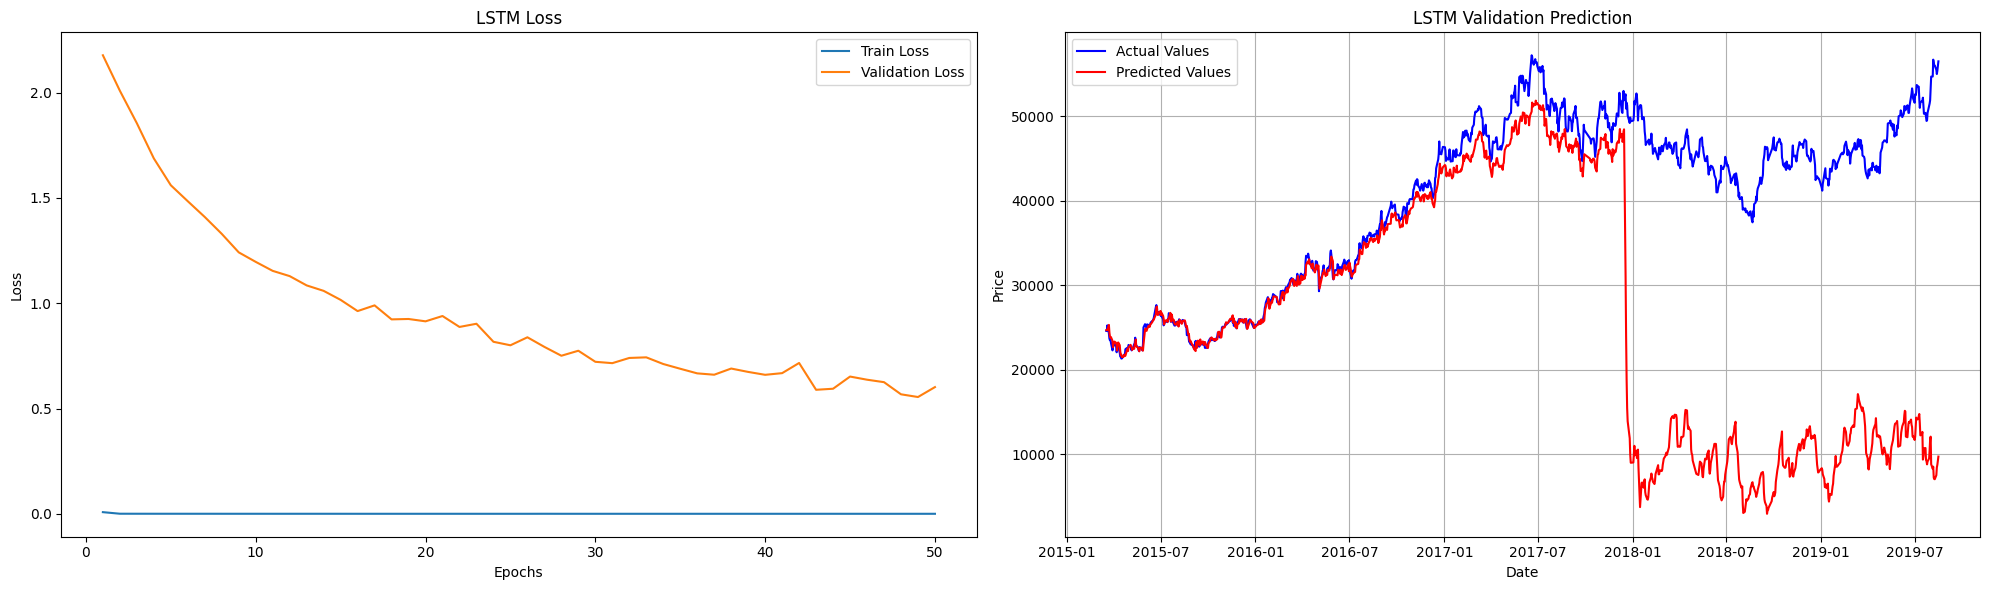

In [ ]:
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int_wo, selected_y_val_int_wo, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper2.predict(X_val) # 여기 모델 이름 바꾸기
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_wo.inverse_transform(y_pred) # 여기 scaler 바꾸기

y_val = y_scaler_selected_int_wo.inverse_transform(y_val) # 여기 scaler 바꾸기

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

Before Inverse Scaling
MAE: 14416.9650
MSE: 496425737.6902
RMSE: 22280.6135
R²: -4.0456
--------------------
After Inverse Scaling
MAE: 0.5020
MSE: 0.6018
RMSE: 0.7758
R²: -4.0456


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


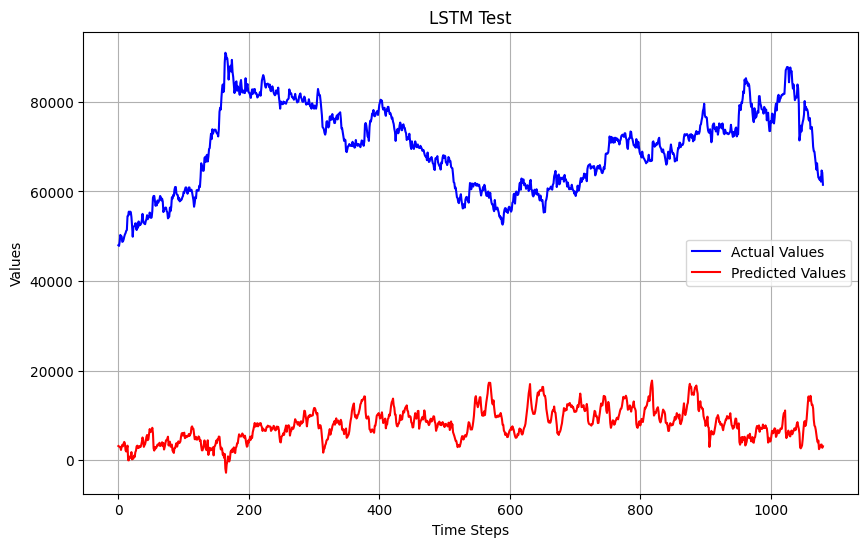

In [ ]:
X_test, y_test = create_sequences(selected_x_test_int_wo, selected_y_test_int_wo, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper2.predict(X_test) # 모델 이름 바꾸기
y_pred = y_scaler_selected_int_wo.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_wo.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### 3

In [ ]:
wandb.init(project="LSTM No Out - Int", name="hyper3", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [128, 64],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/noOut_Int_hyper3.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int_wo, selected_y_train_int_wo, time_steps)
X_val, y_val = create_sequences(selected_x_val_int_wo, selected_y_val_int_wo, time_steps)

model_int_hyper3 = tf.keras.Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(time_steps, len(features2_int))),
    MaxPooling1D(pool_size=2),

    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True), # 여기 feature 바꾸는거 잊지 말기.
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),

    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

optimizer = Adam(learning_rate=0.0005)
model_int_hyper3.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper3.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_int_hyper3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 0.2951 - val_mse: 0.2951
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.2735e-04 - mse: 6.2735e-04 - val_loss: 0.3655 - val_mse: 0.3655
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.1432e-04 - mse: 5.1432e-04 - val_loss: 0.4088 - val_mse: 0.4088
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.6983e-04 - mse: 4.6983e-04 - val_loss: 0.4094 - val_mse: 0.4094
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 4.2747e-04 - mse: 4.2747e-04 - val_loss: 0.3904 - val_mse: 0.3904
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.8488e-04 - mse: 3.8488e-04 - val_loss: 0.3452 - val_mse: 0.3452
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.8233e-04 - mse: 3.8233e-04 - val_loss: 0.3208 - val_mse: 0.3208
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.8777e-04 - mse: 4.8777e-04 - val_loss: 0.2818 - val_mse: 0.

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)                    │ (None, 88, 64)              │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 44, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 44, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 465,605 (1.78 MB)

 Trainable params: 155,201 (606.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 310,404 (1.18 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


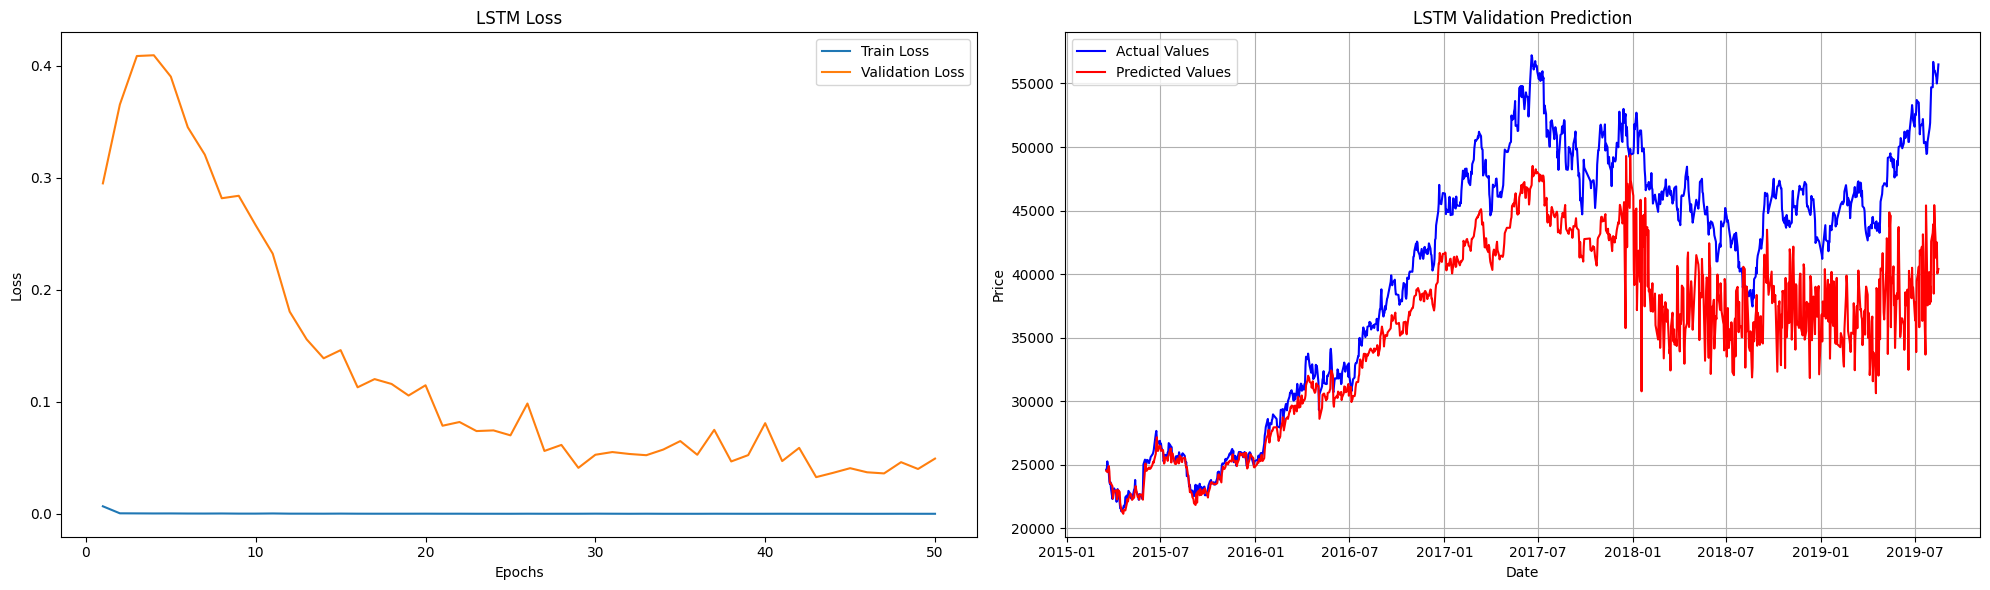

Before Inverse Scaling
MAE: 4968.6727
MSE: 40757912.1902
RMSE: 6384.1924
R²: 0.5857
--------------------
After Inverse Scaling
MAE: 0.1730
MSE: 0.0494
RMSE: 0.2223
R²: 0.5857
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


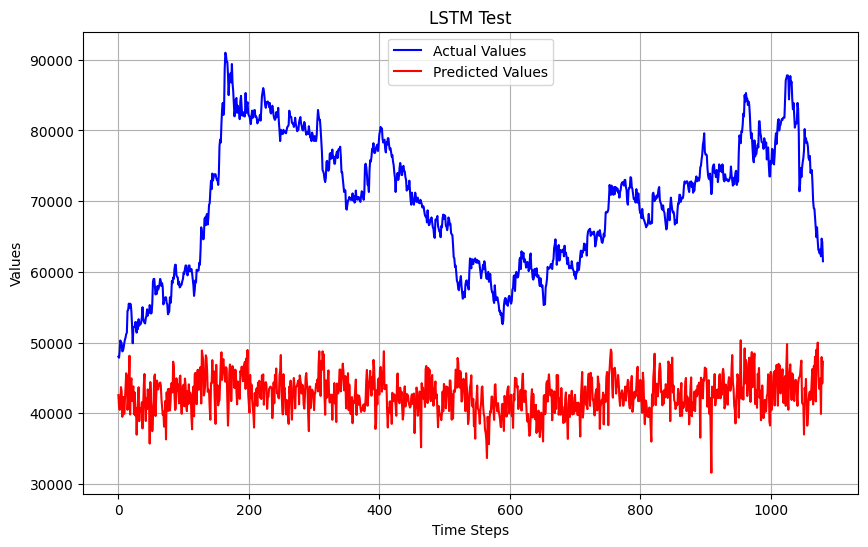

In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int_wo, selected_y_val_int_wo, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper3.predict(X_val) # 여기 모델 이름 바꾸기
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_wo.inverse_transform(y_pred) # 여기 scaler 바꾸기

y_val = y_scaler_selected_int_wo.inverse_transform(y_val) # 여기 scaler 바꾸기

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int_wo, selected_y_test_int_wo, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper3.predict(X_test) # 모델 이름 바꾸기
y_pred = y_scaler_selected_int_wo.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_wo.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### 4

In [ ]:
wandb.init(project="LSTM No Out - Int", name="hyper4", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [128, 64],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/noOut_Int_hyper4.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int_wo, selected_y_train_int_wo, time_steps)
X_val, y_val = create_sequences(selected_x_val_int_wo, selected_y_val_int_wo, time_steps)

model_int_hyper4 = tf.keras.Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=(time_steps, len(features2_int))),
    MaxPooling1D(pool_size=2),

    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True, dropout = 0.2), # 여기 feature 바꾸는거 잊지 말기.
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),

    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

optimizer = Adam(learning_rate=0.0005)
model_int_hyper4.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper4.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_int_hyper4.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0250 - mse: 0.0250 - val_loss: 0.3656 - val_mse: 0.3656
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.3390 - val_mse: 0.3390
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.3033 - val_mse: 0.3033
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.3169 - val_mse: 0.3169
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.2999 - val_mse: 0.2999
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.2664 - val_mse: 0.2664
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.1744 - val_mse: 0.1744
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.2262 - val_mse: 0.2262
Epoch 9/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 86, 64)              │           4,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 43, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 43, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_24 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 470,981 (1.80 MB)

 Trainable params: 156,993 (613.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 313,988 (1.20 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


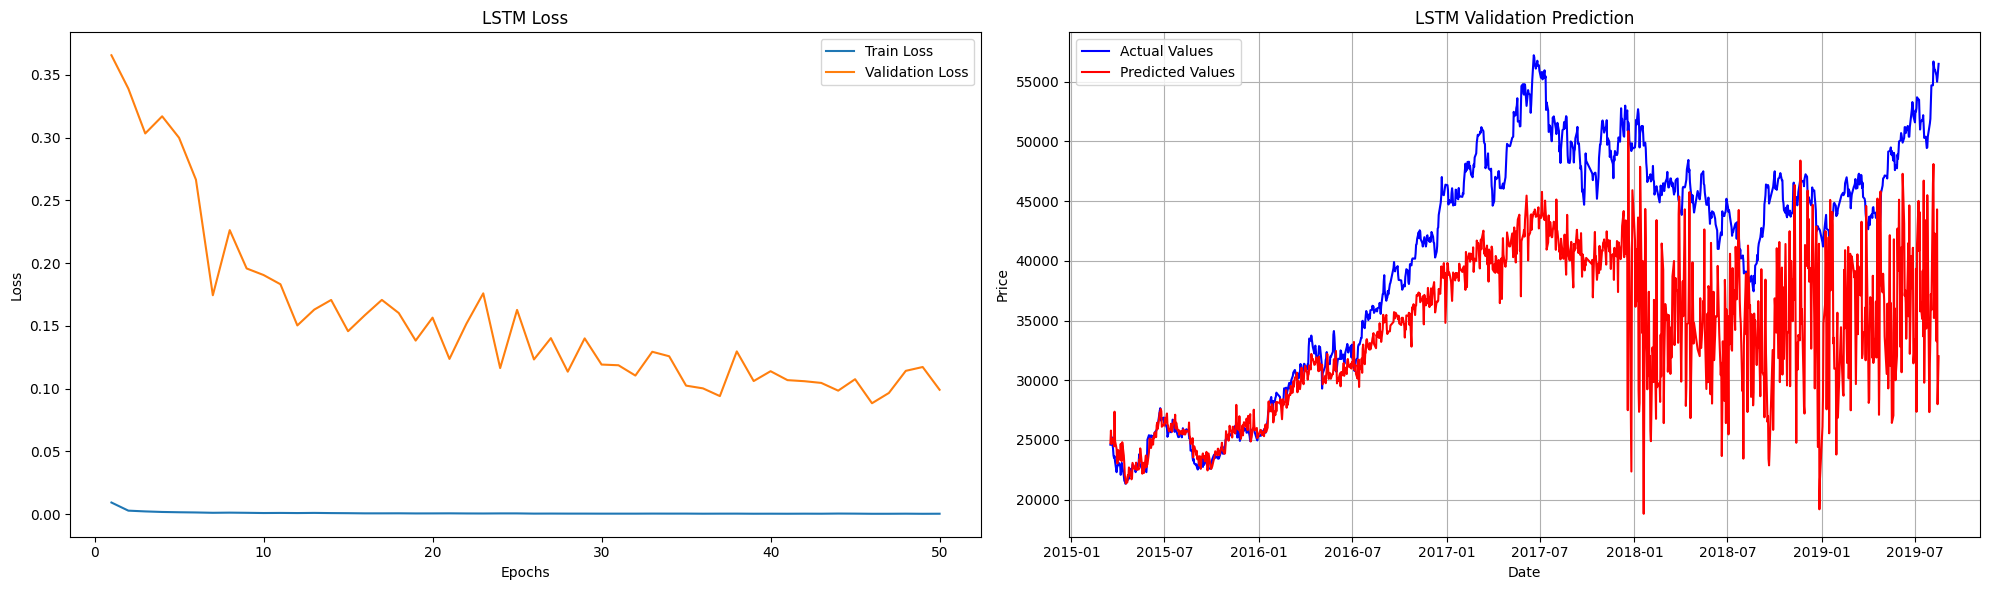

Before Inverse Scaling
MAE: 6664.6168
MSE: 77650361.6275
RMSE: 8811.9443
R²: 0.2108
--------------------
After Inverse Scaling
MAE: 0.2321
MSE: 0.0941
RMSE: 0.3068
R²: 0.2108
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


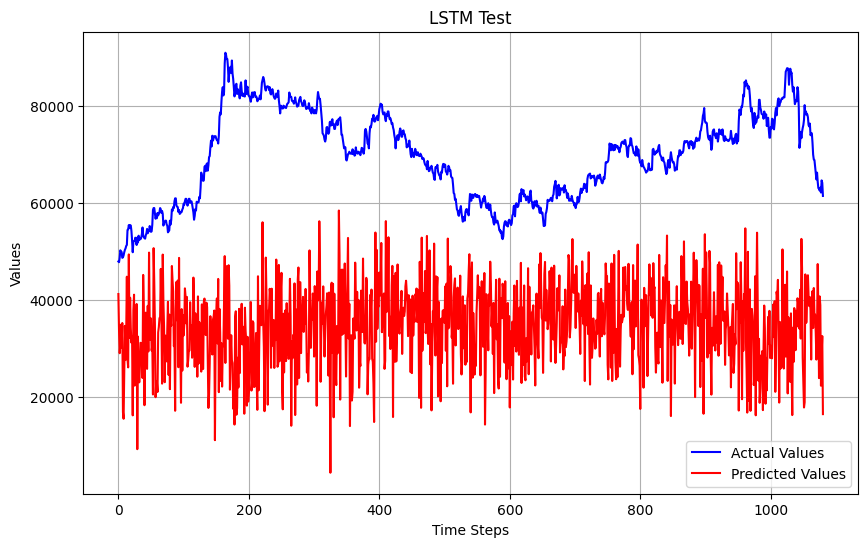

In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int_wo, selected_y_val_int_wo, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper4.predict(X_val) # 여기 모델 이름 바꾸기
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_wo.inverse_transform(y_pred) # 여기 scaler 바꾸기

y_val = y_scaler_selected_int_wo.inverse_transform(y_val) # 여기 scaler 바꾸기

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int_wo, selected_y_test_int_wo, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper4.predict(X_test) # 모델 이름 바꾸기
y_pred = y_scaler_selected_int_wo.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_wo.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### 5

In [ ]:
wandb.init(project="LSTM No Out - Int", name="hyper5", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [128, 64],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/noOut_Int_hyper5.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int_wo, selected_y_train_int_wo, time_steps)
X_val, y_val = create_sequences(selected_x_val_int_wo, selected_y_val_int_wo, time_steps)

model_int_hyper5 = tf.keras.Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=(time_steps, len(features2_int))),
    MaxPooling1D(pool_size=2),

    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh'),#, return_sequences=True), # 여기 feature 바꾸는거 잊지 말기.
    #tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),

    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

optimizer = Adam(learning_rate=0.0001)
model_int_hyper5.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper5.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_int_hyper5.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0663 - mse: 0.0663 - val_loss: 0.1865 - val_mse: 0.1865
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.0654e-04 - mse: 6.0654e-04 - val_loss: 0.4902 - val_mse: 0.4902
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.2397e-04 - mse: 4.2397e-04 - val_loss: 0.7218 - val_mse: 0.7218
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.5403e-04 - mse: 3.5403e-04 - val_loss: 0.8857 - val_mse: 0.8857
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.2768e-04 - mse: 3.2768e-04 - val_loss: 0.9684 - val_mse: 0.9684
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.0357e-04 - mse: 3.0357e-04 - val_loss: 1.0492 - val_mse: 1.0492
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.1647e-04 - mse: 3.1647e-04 - val_loss: 1.0895 - val_mse: 1.0895
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.1024e-04 - mse: 3.1024e-04 - val_loss: 1.1217 - val_mse: 1.121

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)                    │ (None, 86, 64)              │           4,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 43, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_25 (LSTM)                       │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,045 (1.28 MB)

 Trainable params: 111,681 (436.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 223,364 (872.52 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


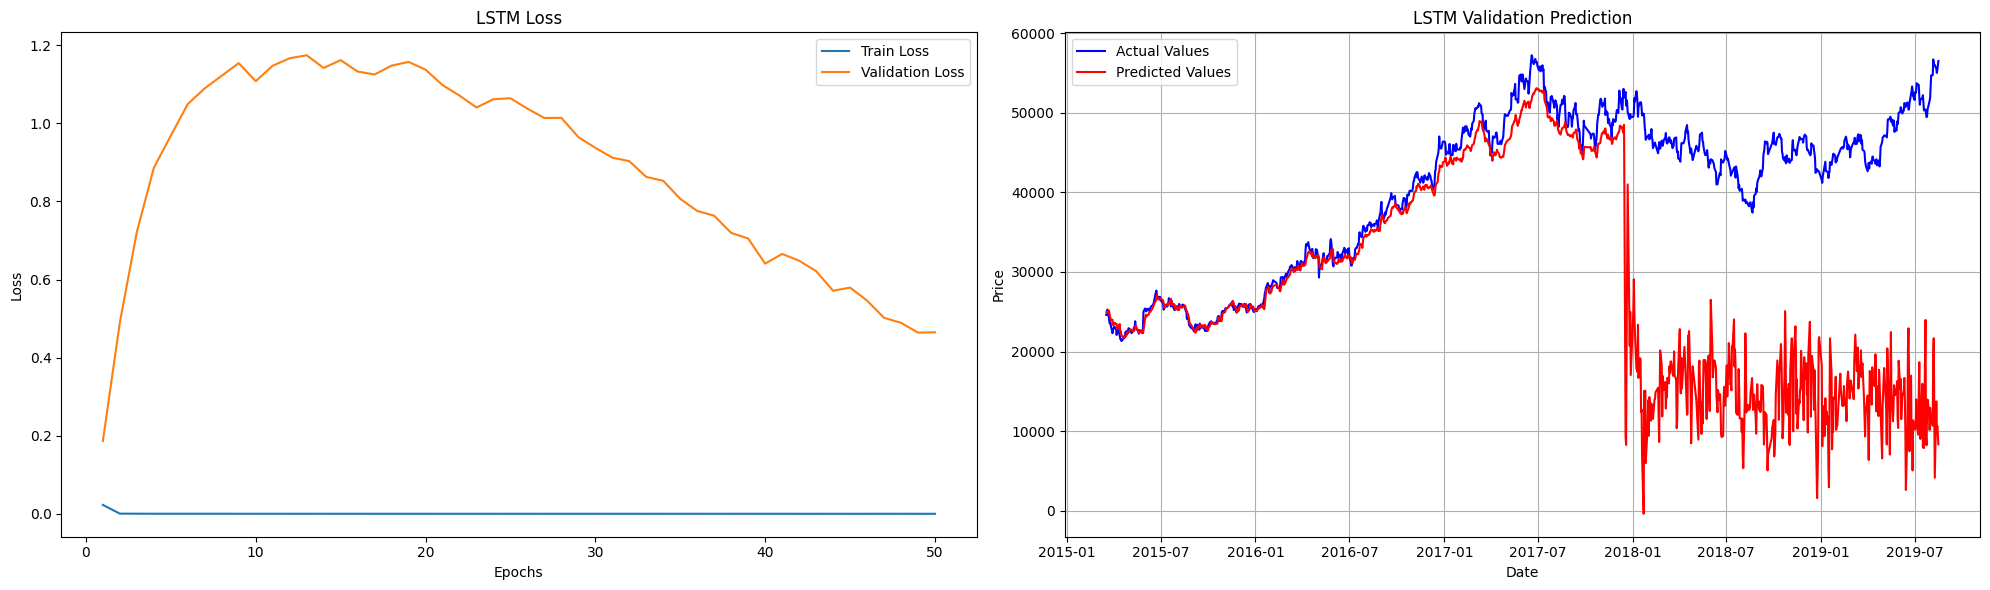

Before Inverse Scaling
MAE: 12539.0239
MSE: 383429604.4890
RMSE: 19581.3586
R²: -2.8971
--------------------
After Inverse Scaling
MAE: 0.4366
MSE: 0.4649
RMSE: 0.6818
R²: -2.8971
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


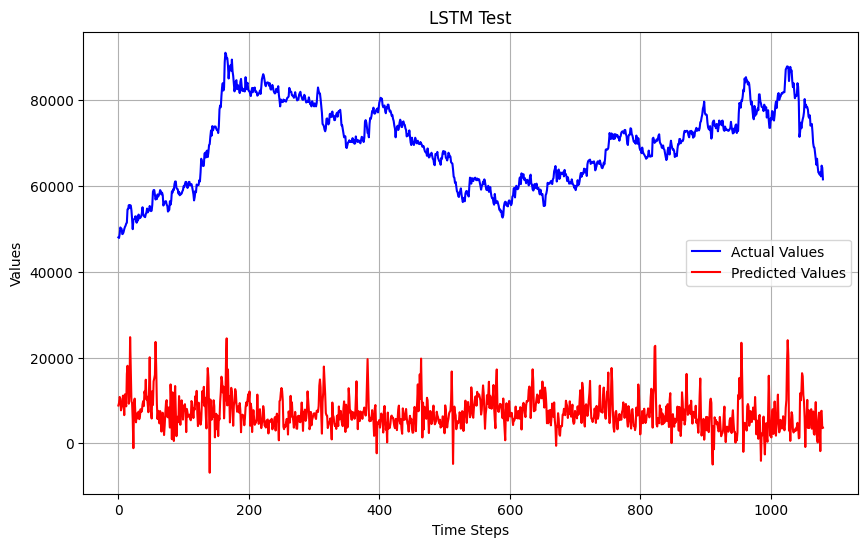

In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int_wo, selected_y_val_int_wo, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper5.predict(X_val) # 여기 모델 이름 바꾸기
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_wo.inverse_transform(y_pred) # 여기 scaler 바꾸기

y_val = y_scaler_selected_int_wo.inverse_transform(y_val) # 여기 scaler 바꾸기

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int_wo, selected_y_test_int_wo, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper5.predict(X_test) # 모델 이름 바꾸기
y_pred = y_scaler_selected_int_wo.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_wo.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### 6

In [ ]:
wandb.init(project="LSTM No Out - Int", name="hyper6", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/noOut_Int_hyper6.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int_wo, selected_y_train_int_wo, time_steps)
X_val, y_val = create_sequences(selected_x_val_int_wo, selected_y_val_int_wo, time_steps)

model_int_hyper6 = tf.keras.Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=(time_steps, len(features2_int))),
    MaxPooling1D(pool_size=2),

    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', dropout=0.2),#, return_sequences=True), # 여기 feature 바꾸는거 잊지 말기.
    #tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),

    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

optimizer = Adam(learning_rate=0.001)
model_int_hyper6.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper6.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_int_hyper6.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0265 - mse: 0.0265 - val_loss: 0.3203 - val_mse: 0.3203
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.4142 - val_mse: 0.4142
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.5092 - val_mse: 0.5092
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.3968 - val_mse: 0.3968
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.4687 - val_mse: 0.4687
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.4682 - val_mse: 0.4682
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.2527e-04 - mse: 9.2527e-04 - val_loss: 0.4264 - val_mse: 0.4264
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.6966e-04 - mse: 8.6966e-04 - val_loss: 0.4830 - val_mse: 0.4830
Epoch 9/50
108/108 ━━━━━━━━━━━━━━━━━

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 86, 64)              │           4,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 43, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_26 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125,381 (489.77 KB)

 Trainable params: 41,793 (163.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 83,588 (326.52 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


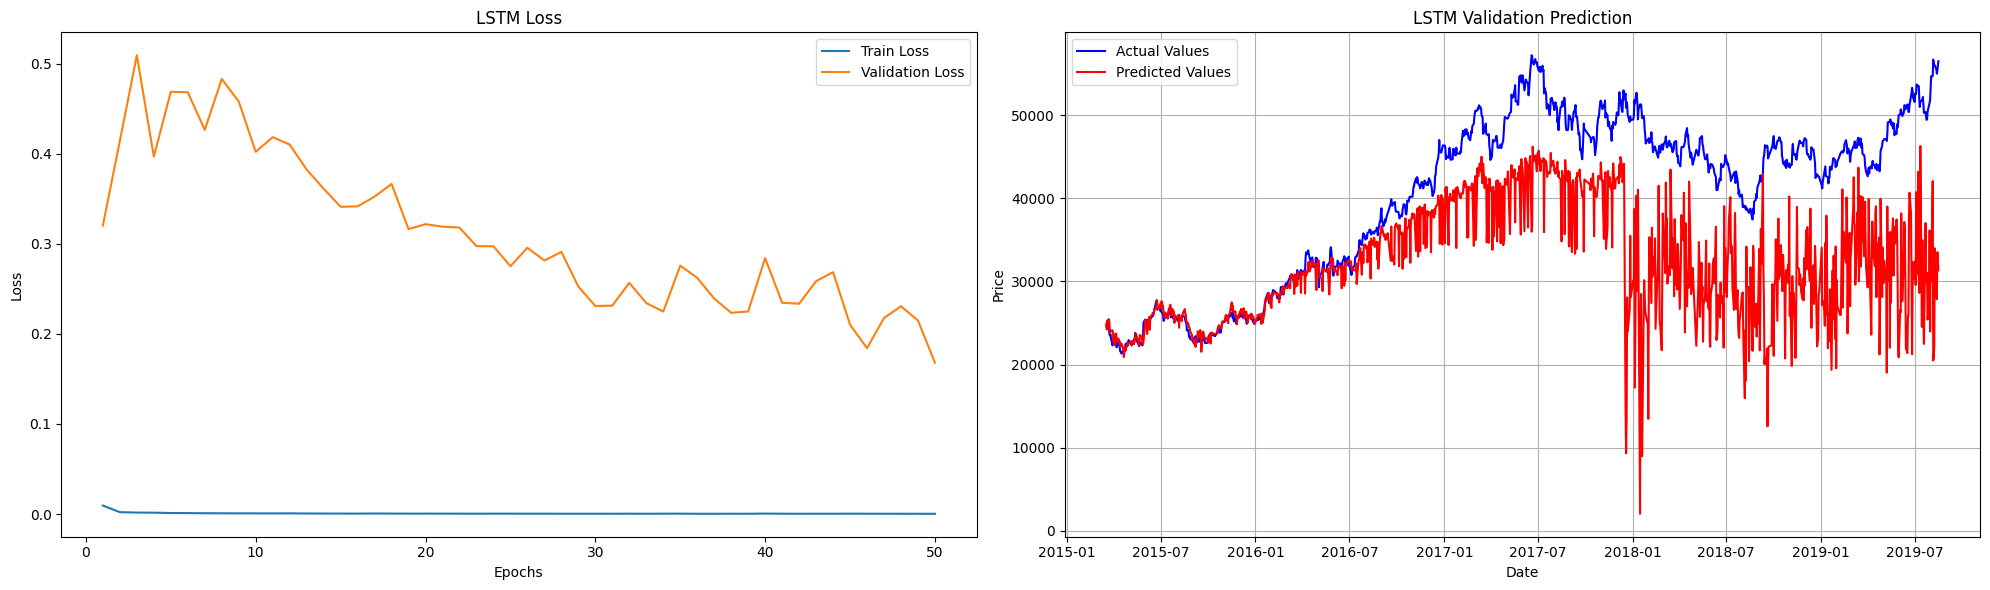

Before Inverse Scaling
MAE: 8404.0044
MSE: 134652861.2792
RMSE: 11604.0020
R²: -0.3686
--------------------
After Inverse Scaling
MAE: 0.2926
MSE: 0.1632
RMSE: 0.4040
R²: -0.3686
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


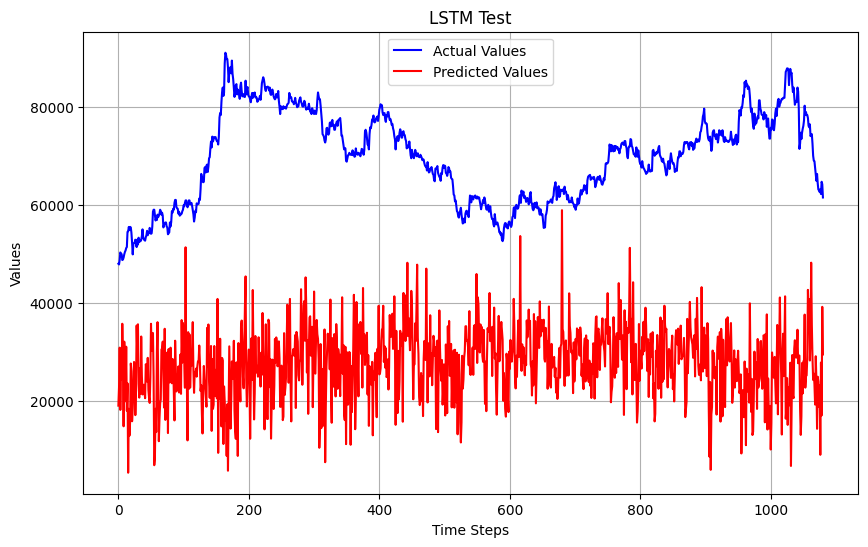

In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int_wo, selected_y_val_int_wo, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper6.predict(X_val) # 여기 모델 이름 바꾸기
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_wo.inverse_transform(y_pred) # 여기 scaler 바꾸기

y_val = y_scaler_selected_int_wo.inverse_transform(y_val) # 여기 scaler 바꾸기

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int_wo, selected_y_test_int_wo, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper6.predict(X_test) # 모델 이름 바꾸기
y_pred = y_scaler_selected_int_wo.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_wo.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### 7

In [ ]:
wandb.init(project="LSTM No Out - Int", name="hyper7", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [128, 64],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/noOut_Int_hyper7.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int_wo, selected_y_train_int_wo, time_steps)
X_val, y_val = create_sequences(selected_x_val_int_wo, selected_y_val_int_wo, time_steps)

model_int_hyper7 = tf.keras.Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=(time_steps, len(features2_int))),
    MaxPooling1D(pool_size=2),

    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', dropout=0.3, return_sequences=True), # 여기 feature 바꾸는거 잊지 말기.
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', dropout=0.3),

    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

optimizer = Adam(learning_rate=0.0005)
model_int_hyper7.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper7.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_int_hyper7.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0698 - mse: 0.0698 - val_loss: 0.5826 - val_mse: 0.5826
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.6377 - val_mse: 0.6377
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.5645 - val_mse: 0.5645
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.5605 - val_mse: 0.5605
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.5541 - val_mse: 0.5541
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.5157 - val_mse: 0.5157
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.5054 - val_mse: 0.5054
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.4774 - val_mse: 0.4774
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - lo

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)                    │ (None, 86, 64)              │           4,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 43, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_27 (LSTM)                       │ (None, 43, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_28 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 470,981 (1.80 MB)

 Trainable params: 156,993 (613.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 313,988 (1.20 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


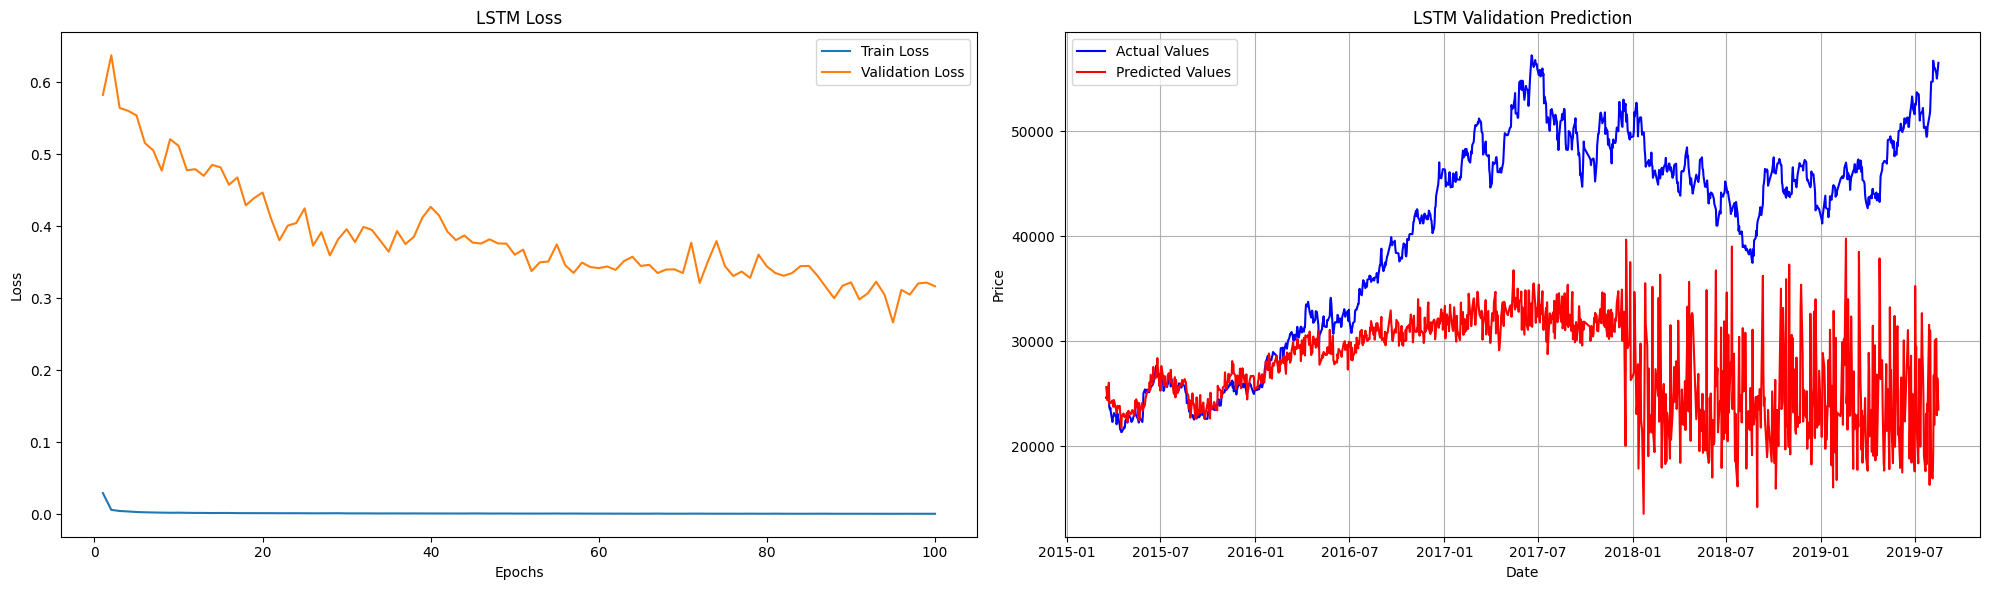

Before Inverse Scaling
MAE: 13050.8657
MSE: 261637828.3672
RMSE: 16175.2227
R²: -1.6592
--------------------
After Inverse Scaling
MAE: 0.4544
MSE: 0.3172
RMSE: 0.5632
R²: -1.6592
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


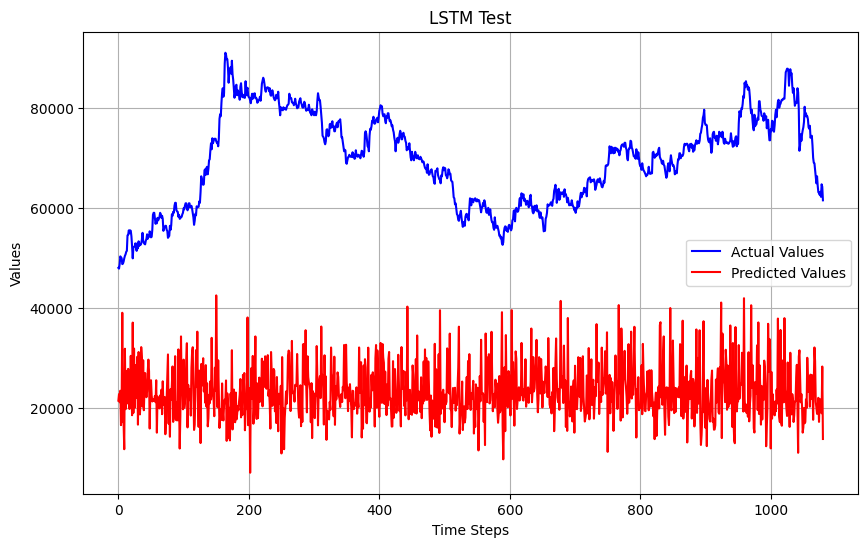

In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int_wo, selected_y_val_int_wo, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper7.predict(X_val) # 여기 모델 이름 바꾸기
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_wo.inverse_transform(y_pred) # 여기 scaler 바꾸기

y_val = y_scaler_selected_int_wo.inverse_transform(y_val) # 여기 scaler 바꾸기

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int_wo, selected_y_test_int_wo, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper7.predict(X_test) # 모델 이름 바꾸기
y_pred = y_scaler_selected_int_wo.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_wo.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### 8

In [ ]:
wandb.finish()

In [ ]:
wandb.init(project="LSTM No Out - Int", name="hyper8", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [64,32,32],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/noOut_Int_hyper8.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int_wo, selected_y_train_int_wo, time_steps)
X_val, y_val = create_sequences(selected_x_val_int_wo, selected_y_val_int_wo, time_steps)

model_int_hyper8 = tf.keras.Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=(time_steps, len(features2_int))),
    MaxPooling1D(pool_size=2),

    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001), return_sequences=True), # 여기 feature 바꾸는거 잊지 말기.
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),


    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)
])

optimizer = Adam(learning_rate=0.0005)
model_int_hyper8.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper8.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_int_hyper8.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - loss: 0.1945 - mse: 0.1001 - val_loss: 0.5733 - val_mse: 0.5026
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0660 - mse: 0.0017 - val_loss: 0.4731 - val_mse: 0.4251
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0451 - mse: 0.0013 - val_loss: 0.4394 - val_mse: 0.4061
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0318 - mse: 0.0011 - val_loss: 0.3786 - val_mse: 0.3546
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0234 - mse: 0.0010 - val_loss: 0.3048 - val_mse: 0.2866
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0181 - mse: 9.8475e-04 - val_loss: 0.2745 - val_mse: 0.2601
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0145 - mse: 8.5177e-04 - val_loss: 0.2353 - val_mse: 0.2236
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0121 - mse: 8.9265e-04 - val_loss: 0.2353 - val_mse: 0.2254
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 1

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 86, 64)              │           4,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 43, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 43, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 43, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,181 (696.02 KB)

 Trainable params: 59,393 (232.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 118,788 (464.02 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step


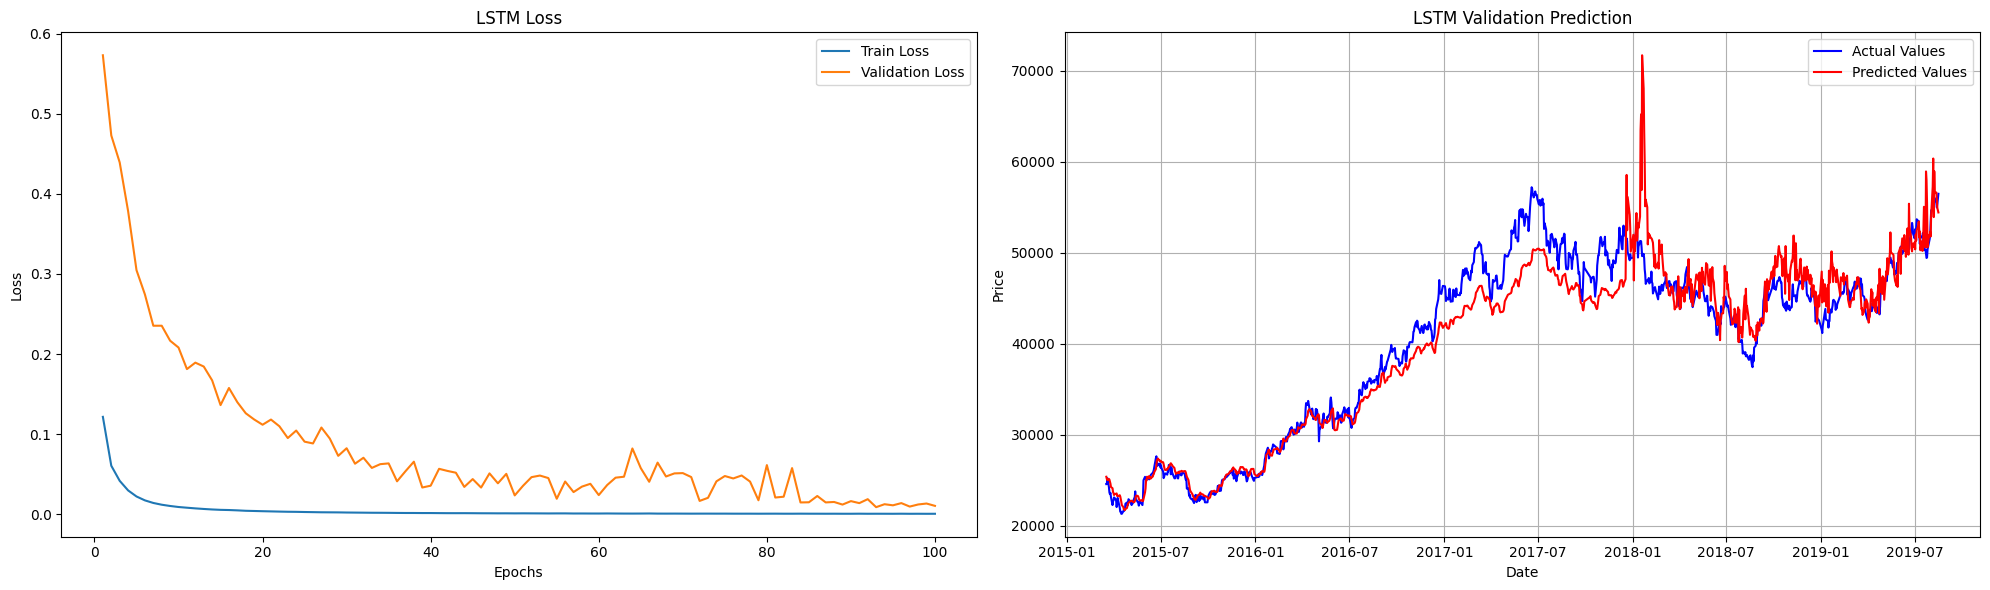

Before Inverse Scaling
MAE: 2043.9700
MSE: 8357997.5626
RMSE: 2891.0202
R²: 0.9151
--------------------
After Inverse Scaling
MAE: 0.0712
MSE: 0.0101
RMSE: 0.1007
R²: 0.9151
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


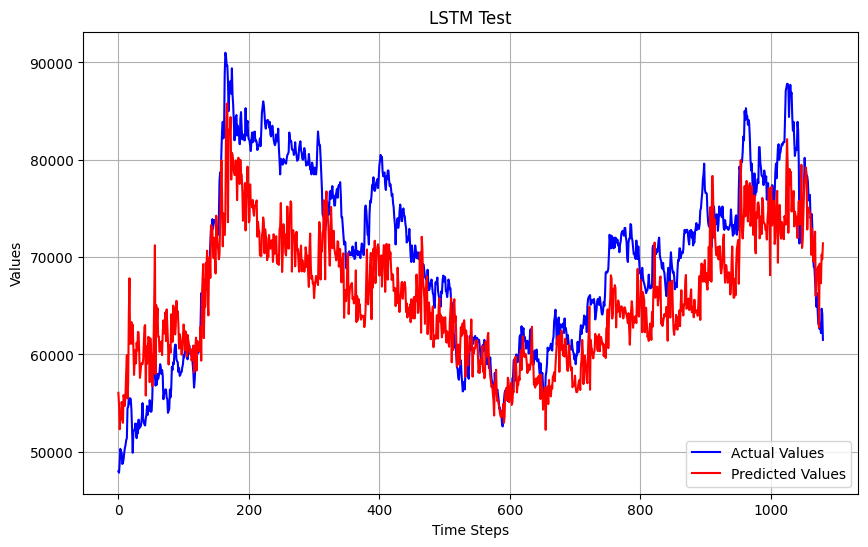

In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int_wo, selected_y_val_int_wo, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper8.predict(X_val) # 여기 모델 이름 바꾸기
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_wo.inverse_transform(y_pred) # 여기 scaler 바꾸기

y_val = y_scaler_selected_int_wo.inverse_transform(y_val) # 여기 scaler 바꾸기

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int_wo, selected_y_test_int_wo, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper8.predict(X_test) # 모델 이름 바꾸기
y_pred = y_scaler_selected_int_wo.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_wo.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### 9

In [ ]:
wandb.finish()

In [ ]:
wandb.init(project="LSTM No Out - Int", name="hyper9", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [64,32,32],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/noOut_Int_hyper9.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int_wo, selected_y_train_int_wo, time_steps)
X_val, y_val = create_sequences(selected_x_val_int_wo, selected_y_val_int_wo, time_steps)

model_int_hyper9 = tf.keras.Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=(time_steps, len(features2_int))),
    MaxPooling1D(pool_size=2),

    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001), return_sequences=True)), # 여기 feature 바꾸는거 잊지 말기.
    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True)),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),


    Attention(),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)
])

optimizer = Adam(learning_rate=0.0005)
model_int_hyper9.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper9.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_int_hyper9.summary()

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.2292 - mse: 0.0452 - val_loss: 0.6167 - val_mse: 0.4897
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1137 - mse: 9.5205e-04 - val_loss: 0.4717 - val_mse: 0.3948
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0692 - mse: 7.5277e-04 - val_loss: 0.3476 - val_mse: 0.3004
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0430 - mse: 6.4407e-04 - val_loss: 0.2602 - val_mse: 0.2301
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0280 - mse: 7.6465e-04 - val_loss: 0.2145 - val_mse: 0.1942
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0192 - mse: 5.8213e-04 - val_loss: 0.1710 - val_mse: 0.1564
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0141 - mse: 5.0009e-04 - val_loss: 0.1490 - val_mse: 0.1378
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0110 - mse: 4.9566e-04 - val_loss: 0.1197 - val_mse: 0.1108
Epoch 9/100
54/54 ━━━━━━━━━━

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 86, 64)              │           4,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 43, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 43, 128)             │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 43, 64)              │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_2 (Attention)              │ (None)                      │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 376,229 (1.44 MB)

 Trainable params: 125,409 (489.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 250,820 (979.77 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


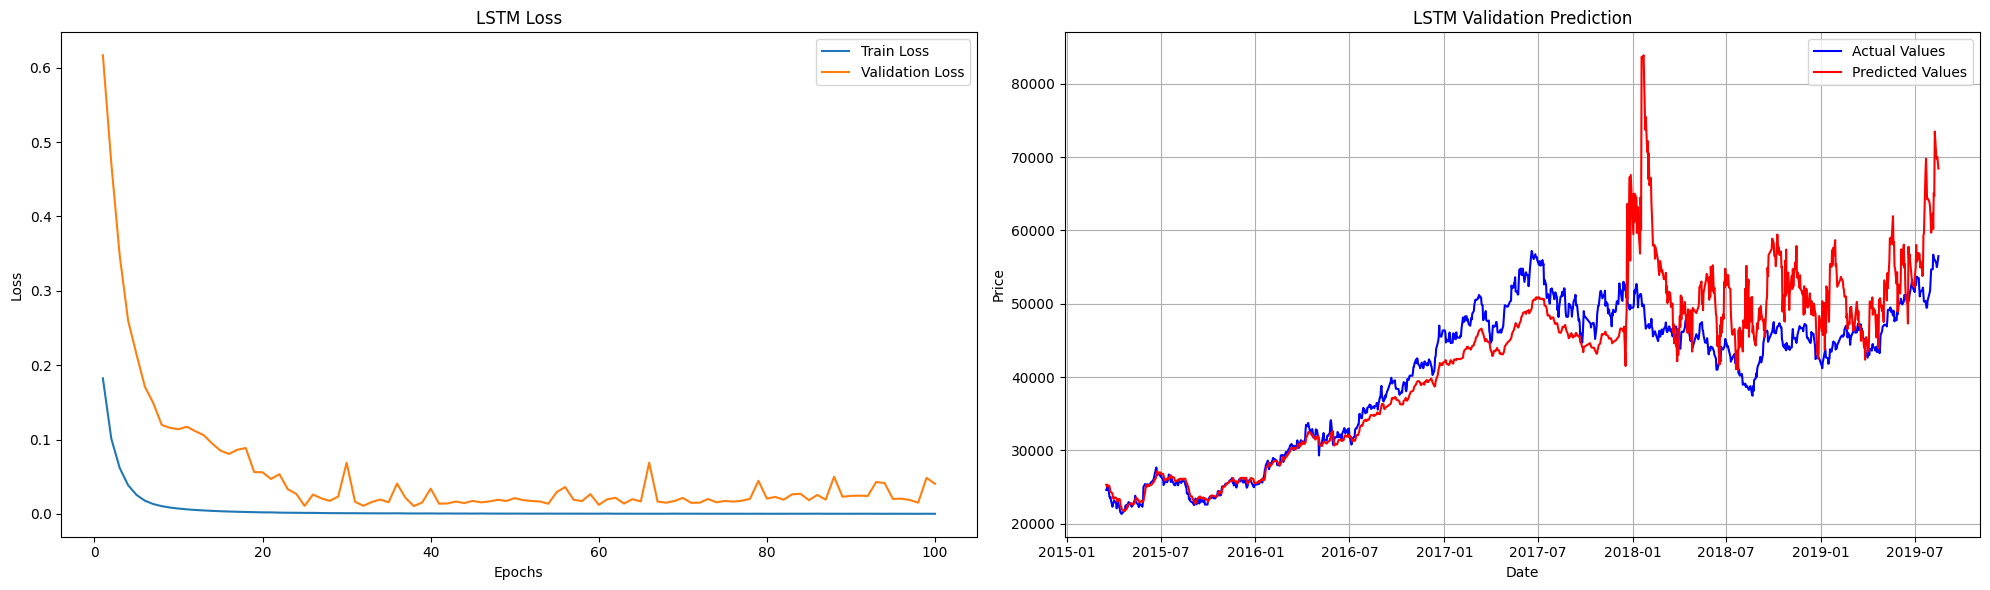

Before Inverse Scaling
MAE: 3830.3259
MSE: 33439629.4723
RMSE: 5782.7009
R²: 0.6601
--------------------
After Inverse Scaling
MAE: 0.1334
MSE: 0.0405
RMSE: 0.2013
R²: 0.6601
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


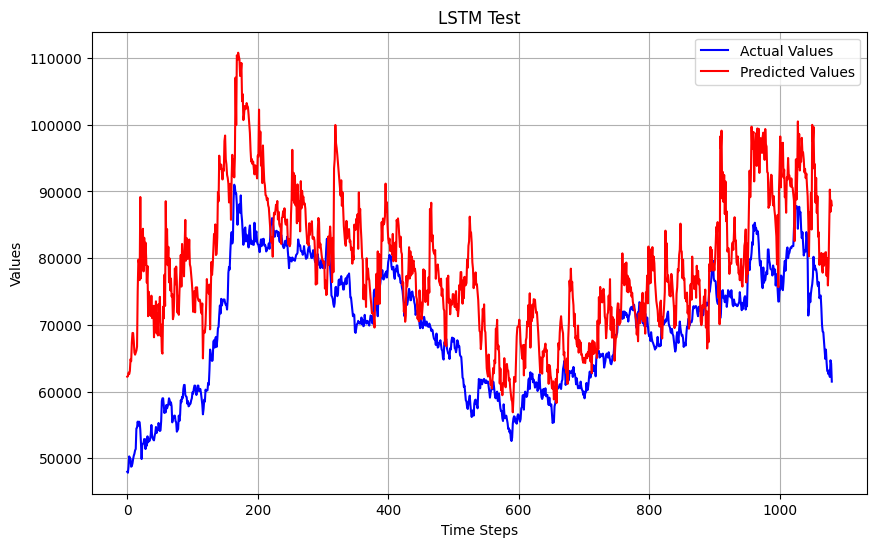

In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int_wo, selected_y_val_int_wo, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper9.predict(X_val) # 여기 모델 이름 바꾸기
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_wo.inverse_transform(y_pred) # 여기 scaler 바꾸기

y_val = y_scaler_selected_int_wo.inverse_transform(y_val) # 여기 scaler 바꾸기

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int_wo, selected_y_test_int_wo, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper9.predict(X_test) # 모델 이름 바꾸기
y_pred = y_scaler_selected_int_wo.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_wo.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### 10

In [52]:
wandb.finish()

In [53]:
wandb.init(project="LSTM No Out - Int", name="hyper10", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [64,32,32],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/noOut_Int_hyper10.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int_wo, selected_y_train_int_wo, time_steps)
X_val, y_val = create_sequences(selected_x_val_int_wo, selected_y_val_int_wo, time_steps)

inputs = Input(shape=(time_steps, len(features2_int)))

# Conv1D와 MaxPooling
x = Conv1D(64, kernel_size=5, activation='relu')(inputs)
x = MaxPooling1D(pool_size=2)(x)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh',
             kernel_regularizer=tf.keras.regularizers.l2(0.001),
             return_sequences=True)(x)

# Skip Connection 1
lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True)(lstm1)

# 차원 맞추기
lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)

# Add 레이어 적용
skip1 = Add()([lstm1, lstm2_adjusted])

# LSTM 층 - 두 번째 LSTM
lstm3 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip1)

# Dense Layers
dense1 = Dense(32, activation='relu')(lstm3)
outputs = Dense(1)(dense1)

# 모델 정의
model_int_hyper10 = Model(inputs=inputs, outputs=outputs)

# 컴파일
optimizer = Adam(learning_rate=0.0001)
model_int_hyper10.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper10.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_int_hyper10.summary()

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.1664 - mse: 0.0670 - val_loss: 0.4765 - val_mse: 0.3831
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0936 - mse: 0.0022 - val_loss: 0.4242 - val_mse: 0.3387
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0850 - mse: 0.0015 - val_loss: 0.3869 - val_mse: 0.3089
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0775 - mse: 0.0012 - val_loss: 0.3481 - val_mse: 0.2769
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0707 - mse: 0.0011 - val_loss: 0.3107 - val_mse: 0.2458
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0645 - mse: 0.0011 - val_loss: 0.2872 - val_mse: 0.2281
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0587 - mse: 9.8247e-04 - val_loss: 0.2667 - val_mse: 0.2129
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0534 - mse: 8.4544e-04 - val_loss: 0.2492 - val_mse: 0.2001
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/s

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 90, 14)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_6 (Conv1D)         │ (None, 86, 64)         │          4,544 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_6           │ (None, 43, 64)         │              0 │ conv1d_6[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_14 (LSTM)            │ (None, 43, 64)         │         33,024 │ max_pooling1d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_15 (LSTM)            │ (None, 43, 32)         │         12,416 │ lstm_14[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 43, 64)         │          2,112 │ lstm_15[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 43, 64)         │              0 │ lstm_14[0][0],         │
│                           │                        │                │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_16 (LSTM)            │ (None, 32)             │         12,416 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 32)             │          1,056 │ lstm_16[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 1)              │             33 │ dense_7[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 196,805 (768.77 KB)

 Trainable params: 65,601 (256.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 131,204 (512.52 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


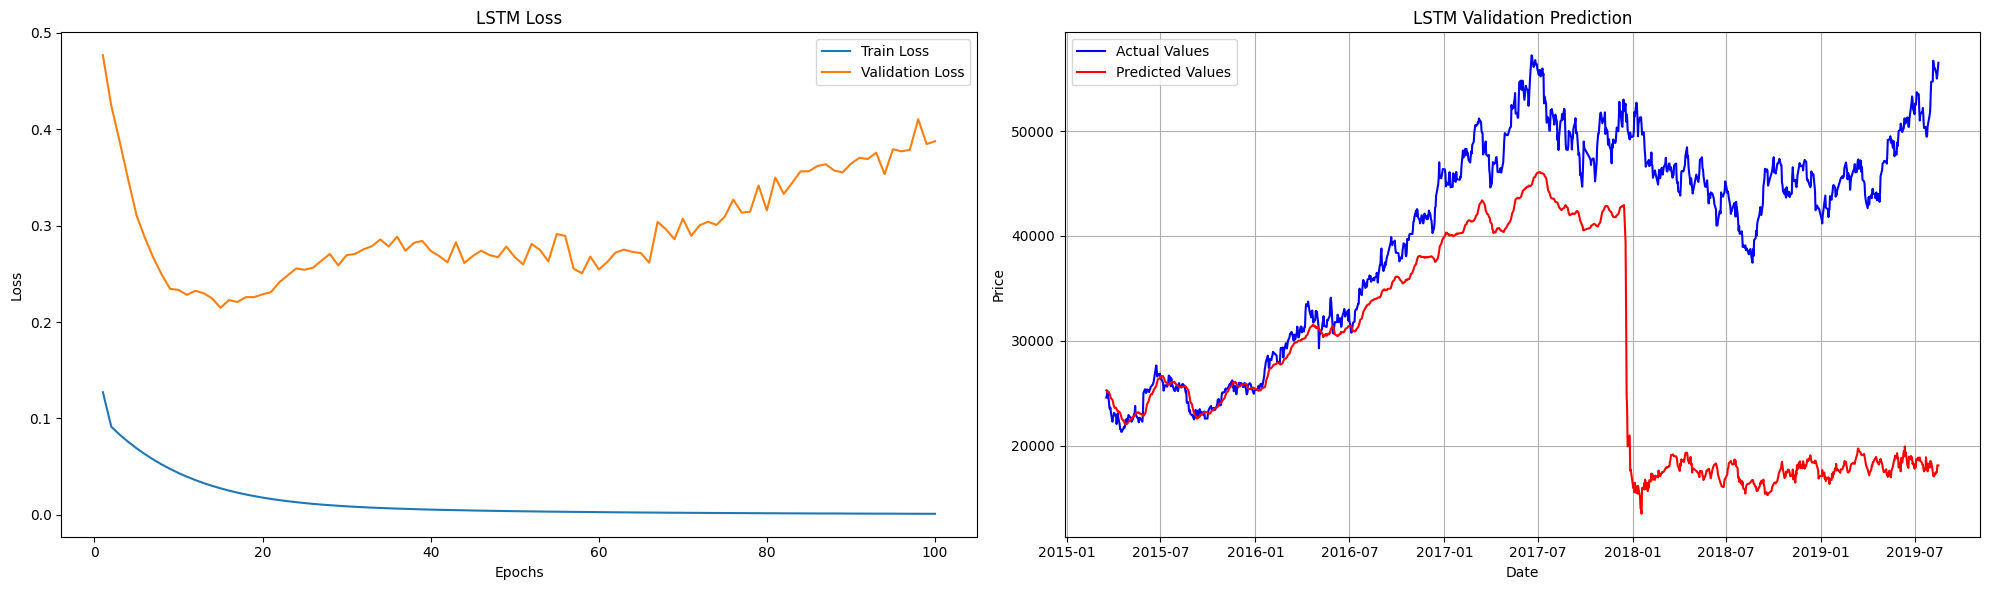

Before Inverse Scaling
MAE: 12789.5973
MSE: 318828812.3553
RMSE: 17855.7781
R²: -2.2405
--------------------
After Inverse Scaling
MAE: 0.4453
MSE: 0.3865
RMSE: 0.6217
R²: -2.2405
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


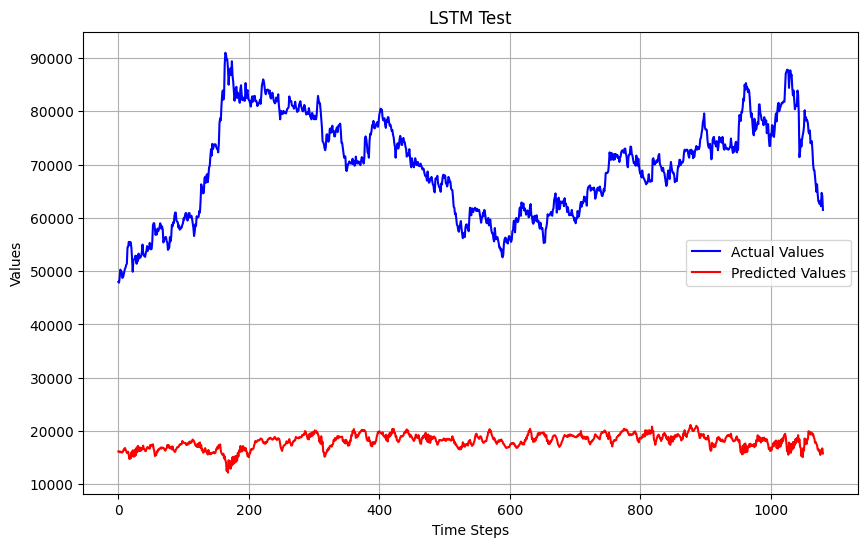

In [54]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int_wo, selected_y_val_int_wo, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper10.predict(X_val) # 여기 모델 이름 바꾸기
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_wo.inverse_transform(y_pred) # 여기 scaler 바꾸기

y_val = y_scaler_selected_int_wo.inverse_transform(y_val) # 여기 scaler 바꾸기

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int_wo, selected_y_test_int_wo, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper10.predict(X_test) # 모델 이름 바꾸기
y_pred = y_scaler_selected_int_wo.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_wo.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Before Outlier Scaling

### Same

##### init

In [ ]:
wandb.init(project="LSTM No Out Scaling - Same", name="initial", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/scaling_same_init.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_same_wo_scaling, y_train_same_wo_scaling, time_steps)
X_val, y_val = create_sequences(x_val_same_wo_scaling, y_val_same_wo_scaling, time_steps)

model_same_init = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True), # 여기 feature 바꾸는거 잊지 말기.
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),
    tf.keras.layers.Dense(1)
])

model_same_init.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_same_init.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_same_init.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0523 - mse: 0.0523 - val_loss: 0.0456 - val_mse: 0.0456
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.4183e-04 - mse: 8.4183e-04 - val_loss: 0.0432 - val_mse: 0.0432
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.1653e-04 - mse: 5.1653e-04 - val_loss: 0.0427 - val_mse: 0.0427
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.9011e-04 - mse: 3.9011e-04 - val_loss: 0.0425 - val_mse: 0.0425
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.2552e-04 - mse: 3.2552e-04 - val_loss: 0.0440 - val_mse: 0.0440
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.7291e-04 - mse: 2.7291e-04 - val_loss: 0.0377 - val_mse: 0.0377
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.9322e-04 - mse: 2.9322e-04 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.3411e-04 - mse: 3.3411e-04 - val_loss: 0.0398 - val_mse:

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 90, 64)              │          28,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,749 (717.77 KB)

 Trainable params: 61,249 (239.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 122,500 (478.52 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


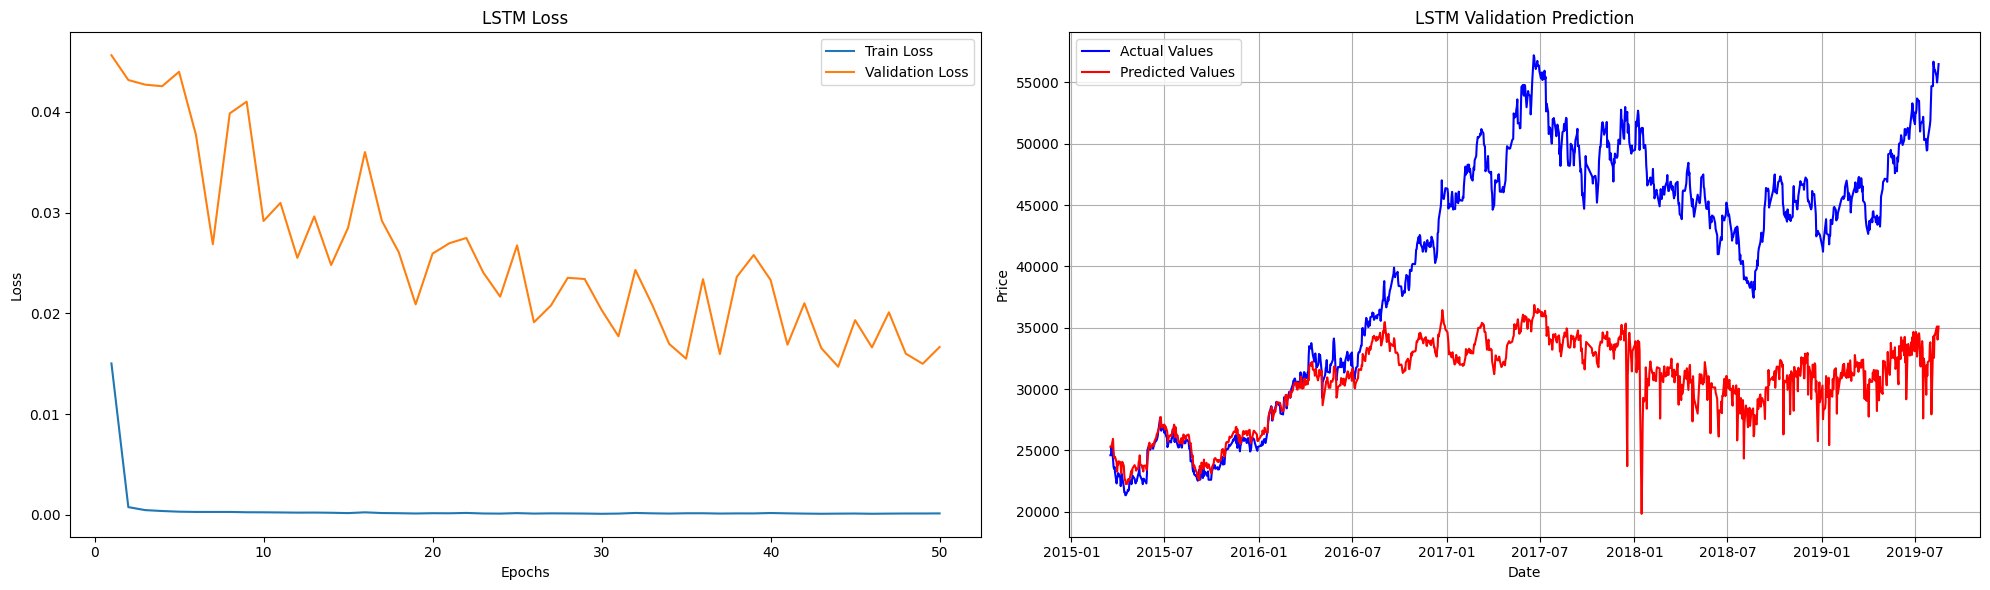

In [ ]:
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(x_val_same_wo_scaling, y_val_same_wo_scaling, time_steps) # 여기 val same, int 바꾸기

y_pred = model_same_init.predict(X_val) # 여기 모델 이름 바꾸기
a,b = y_val, y_pred
y_pred = y_scaler_same_wo_scaling.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_same_wo_scaling.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(same_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(same_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

Before Inverse Scaling
MAE: 9990.3102
MSE: 150522404.1588
RMSE: 12268.7572
R²: -0.5299
--------------------
After Inverse Scaling
MAE: 0.1067
MSE: 0.0167
RMSE: 0.1291
R²: -0.2951


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


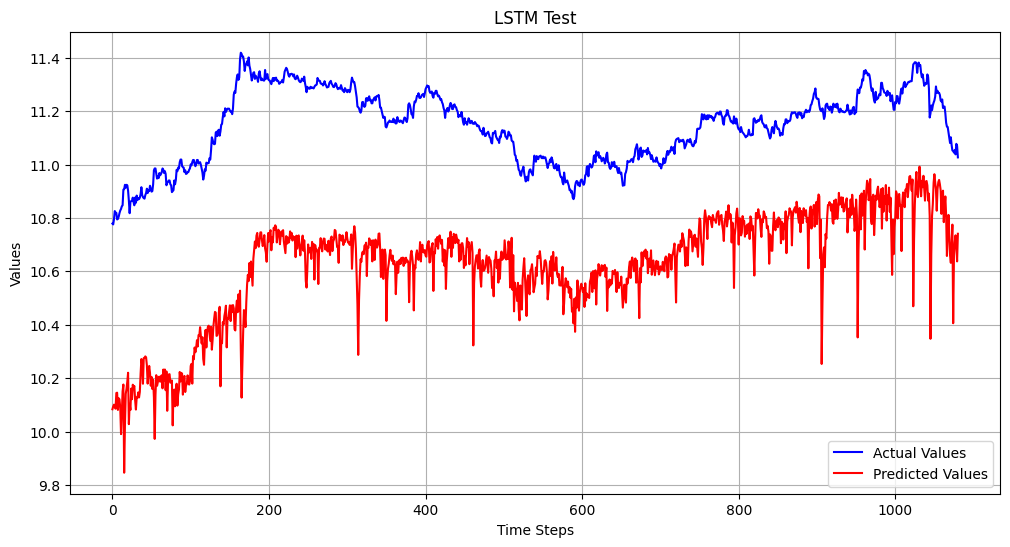

In [ ]:
X_test, y_test = create_sequences(x_test_same_wo_scaling, y_test_same_wo_scaling, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_same_init.predict(X_test) # 모델 이름 바꾸기
y_pred = y_scaler_same_wo_scaling.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_same_wo_scaling.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### hyper1

In [ ]:
wandb.init(project="LSTM No Out Scaling - Same", name="hyper1", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/scaling_same_hyper1.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_same_wo_scaling, y_train_same_wo_scaling, time_steps)
X_val, y_val = create_sequences(x_val_same_wo_scaling, y_val_same_wo_scaling, time_steps)

model_same_hyper1 = tf.keras.Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(time_steps, len(features))),
    MaxPooling1D(pool_size=2),
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True), # 여기 feature 바꾸는거 잊지 말기.
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

model_same_hyper1.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_same_hyper1.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_same_hyper1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0491 - val_mse: 0.0491
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0481 - val_mse: 0.0481
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 5.6567e-04 - mse: 5.6567e-04 - val_loss: 0.0494 - val_mse: 0.0494
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.1250e-04 - mse: 5.1250e-04 - val_loss: 0.0415 - val_mse: 0.0415
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.4000e-04 - mse: 4.4000e-04 - val_loss: 0.0473 - val_mse: 0.0473
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.2526e-04 - mse: 4.2526e-04 - val_loss: 0.0446 - val_mse: 0.0446
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 4.9744e-04 - mse: 4.9744e-04 - val_loss: 0.0476 - val_mse: 0.0476
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 4.4432e-04 - mse: 4.4432e-04 - val_loss: 0.0373 - val_mse: 0.0373
E

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 88, 64)              │           8,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 44, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 44, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 236,933 (925.52 KB)

 Trainable params: 78,977 (308.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 157,956 (617.02 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


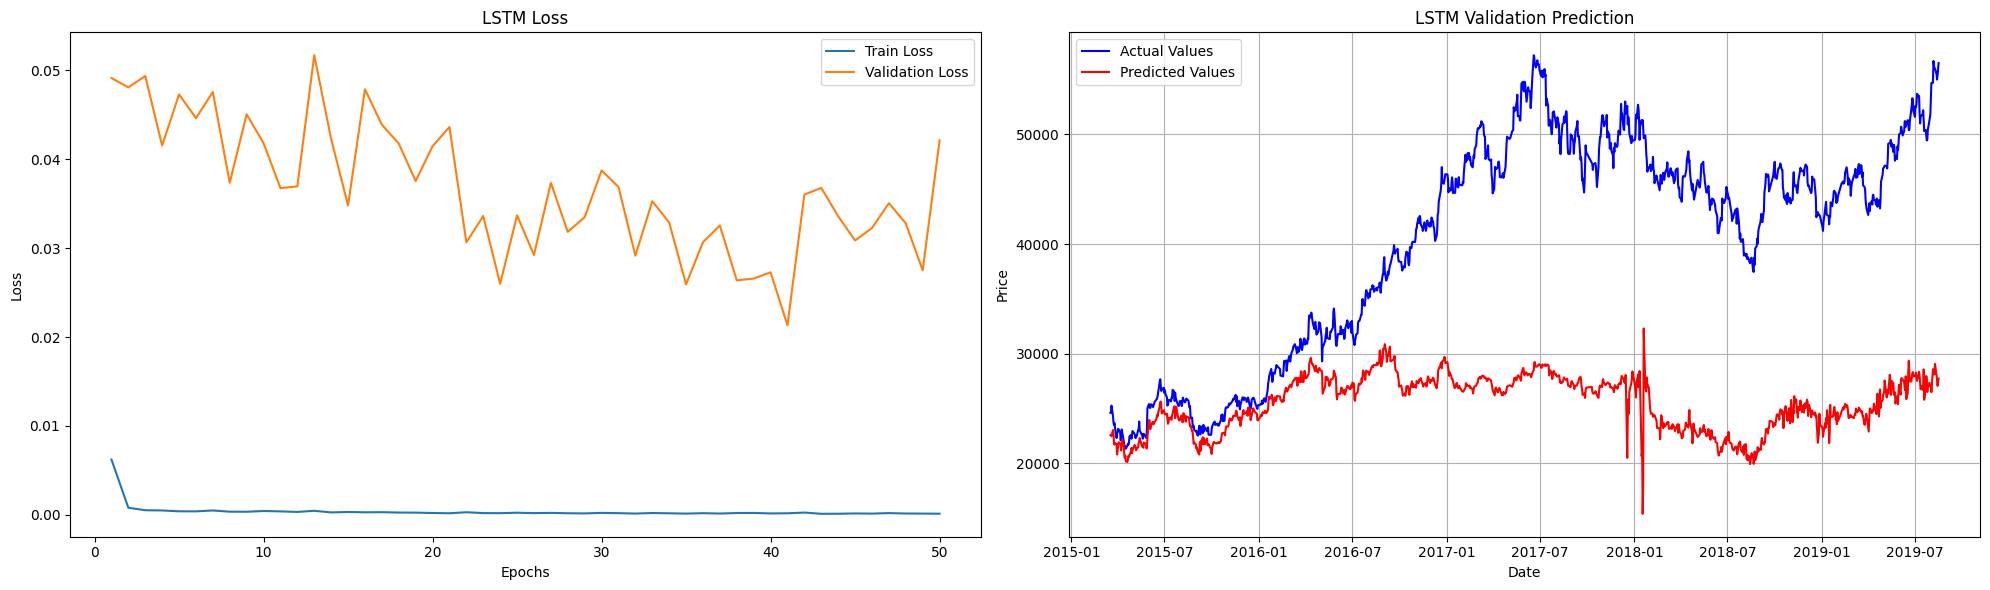

In [ ]:
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(x_val_same_wo_scaling, y_val_same_wo_scaling, time_steps) # 여기 val same, int 바꾸기

y_pred = model_same_hyper1.predict(X_val) # 여기 모델 이름 바꾸기
a,b = y_val, y_pred
y_pred = y_scaler_same_wo_scaling.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_same_wo_scaling.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(same_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(same_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

Before Inverse Scaling
MAE: 14844.1285
MSE: 305288699.5993
RMSE: 17472.5127
R²: -2.1029
--------------------
After Inverse Scaling
MAE: 0.1771
MSE: 0.0421
RMSE: 0.2053
R²: -2.2757


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


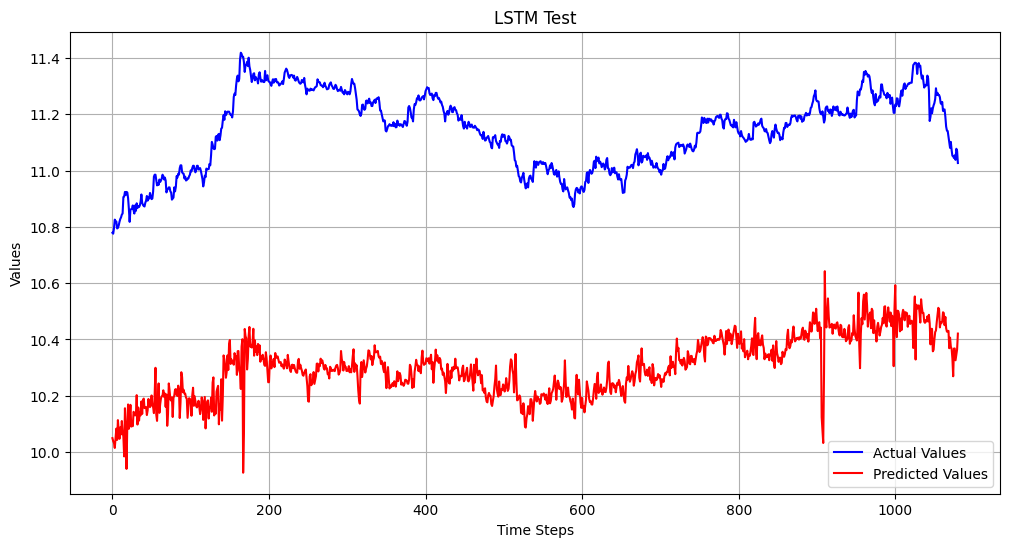

In [ ]:
X_test, y_test = create_sequences(x_test_same_wo_scaling, y_test_same_wo_scaling, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_same_hyper1.predict(X_test) # 모델 이름 바꾸기
y_pred = y_scaler_same_wo_scaling.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_same_wo_scaling.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

### Int

##### init

In [ ]:
wandb.init(project="LSTM No Out Scaling - Int", name="initial", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/scaling_int_init.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_int_wo_scaling, y_train_int_wo_scaling, time_steps)
X_val, y_val = create_sequences(x_val_int_wo_scaling, y_val_int_wo_scaling, time_steps)

model_int_init = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True), # 여기 feature 바꾸는거 잊지 말기.
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),
    tf.keras.layers.Dense(1)
])

model_int_init.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_init.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_int_init.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0415 - mse: 0.0415 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 5.2450e-04 - mse: 5.2450e-04 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.7425e-04 - mse: 3.7425e-04 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.5323e-04 - mse: 3.5323e-04 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.7282e-04 - mse: 3.7282e-04 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.1815e-04 - mse: 3.1815e-04 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2974e-04 - mse: 2.2974e-04 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.4915e-04 - mse: 2.4915e-04 - val_loss: 0.0237 - val_mse:

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                       │ (None, 90, 64)              │          28,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,749 (717.77 KB)

 Trainable params: 61,249 (239.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 122,500 (478.52 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


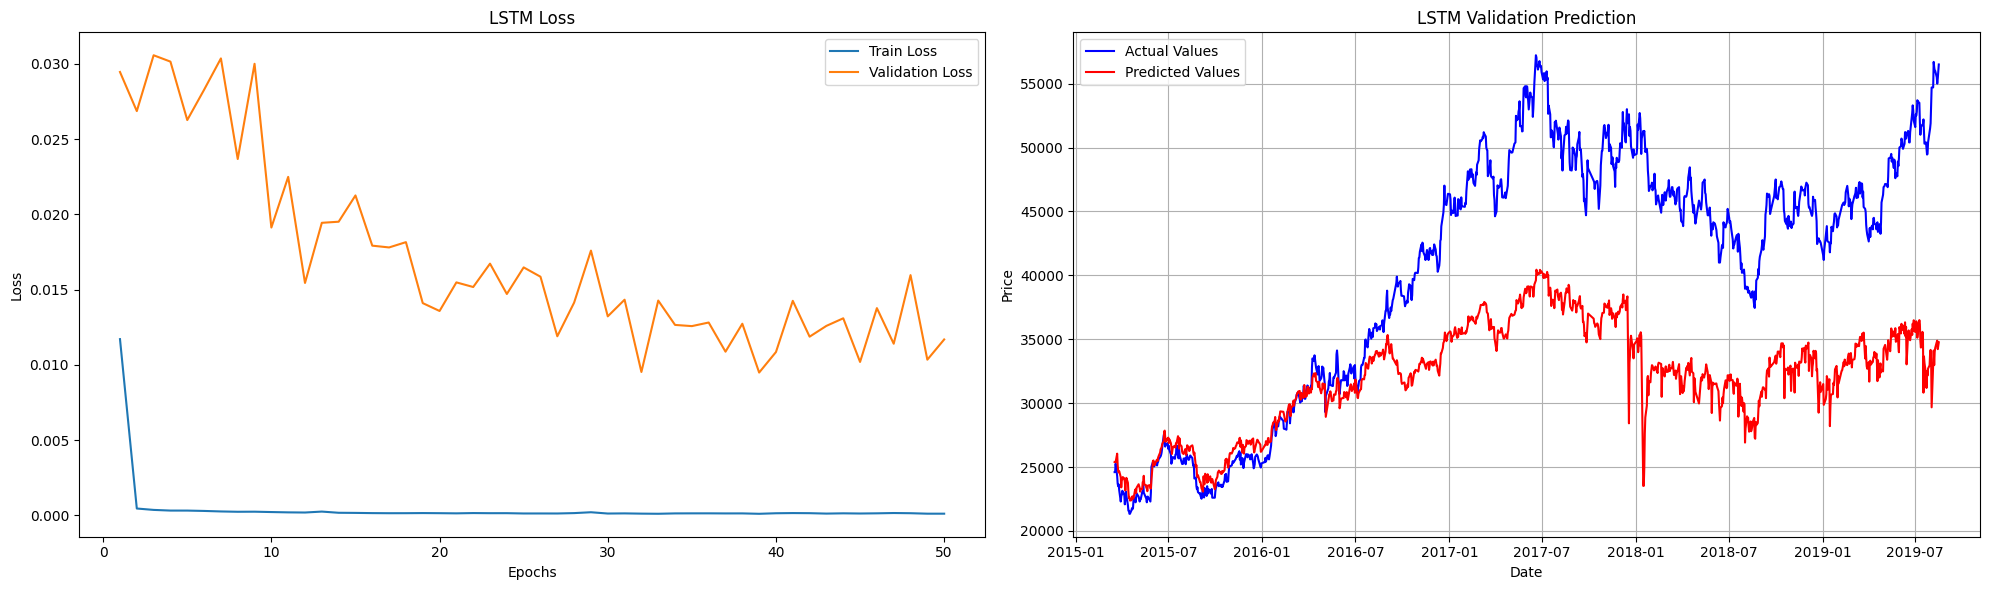

In [ ]:
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(x_val_int_wo_scaling, y_val_int_wo_scaling, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_init.predict(X_val) # 여기 모델 이름 바꾸기
a,b = y_val, y_pred
y_pred = y_scaler_int_wo_scaling.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_int_wo_scaling.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

Before Inverse Scaling
MAE: 8674.3897
MSE: 111158956.9376
RMSE: 10543.1948
R²: -0.1298
--------------------
After Inverse Scaling
MAE: 0.0906
MSE: 0.0117
RMSE: 0.1081
R²: 0.0911


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


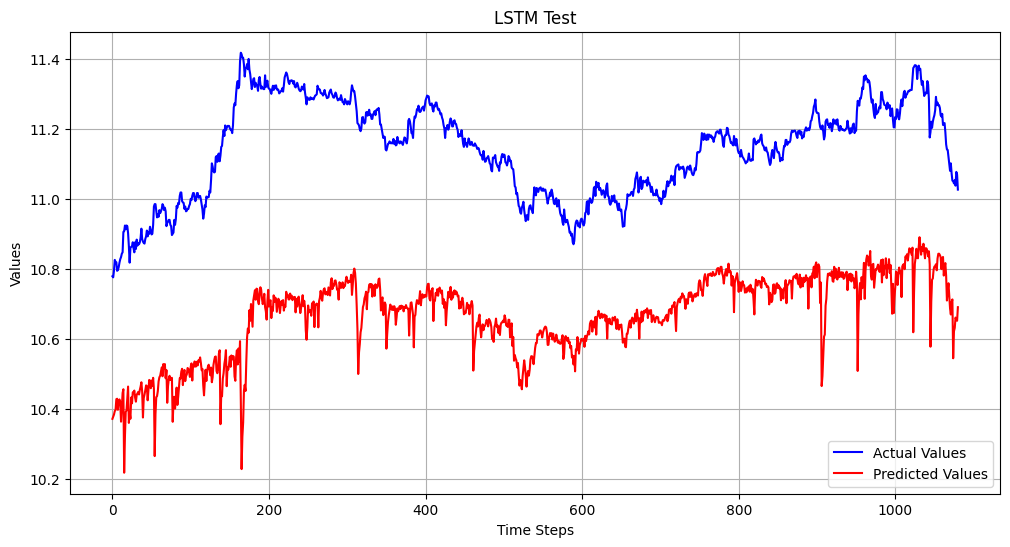

In [ ]:
X_test, y_test = create_sequences(x_test_int_wo_scaling, y_test_int_wo_scaling, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_init.predict(X_test) # 모델 이름 바꾸기
y_pred = y_scaler_int_wo_scaling.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_int_wo_scaling.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### hyper1

In [ ]:
wandb.finish()

In [ ]:
wandb.init(project="LSTM No Out Scaling - Int", name="hyper1", config={
    "epochs": 100,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/scaling_int_hyper1.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_int_wo_scaling, y_train_int_wo_scaling, time_steps)
X_val, y_val = create_sequences(x_val_int_wo_scaling, y_val_int_wo_scaling, time_steps)

model_int_hyper1 = tf.keras.Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(time_steps, len(features))),
    MaxPooling1D(pool_size=2),
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True), # 여기 feature 바꾸는거 잊지 말기.
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

optimizer = Adam(learning_rate=0.0005)
model_int_hyper1.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper1.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_int_hyper1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0741 - mse: 0.0741 - val_loss: 0.0635 - val_mse: 0.0635
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0453 - val_mse: 0.0453
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.2754e-04 - mse: 6.2754e-04 - val_loss: 0.0396 - val_mse: 0.0396
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.1695e-04 - mse: 6.1695e-04 - val_loss: 0.0411 - val_mse: 0.0411
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 4.9187e-04 - mse: 4.9187e-04 - val_loss: 0.0406 - val_mse: 0.0406
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 4.2795e-04 - mse: 4.2795e-04 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 4.3689e-04 - mse: 4.3689e-04 - val_loss: 0.0448 - val_mse: 0.0448
Epoch 8/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 4.1450e-04 - mse: 4.1450e-04 - val_loss: 0.0405 - val_mse:

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 88, 64)              │           8,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 44, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 44, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 236,933 (925.52 KB)

 Trainable params: 78,977 (308.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 157,956 (617.02 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


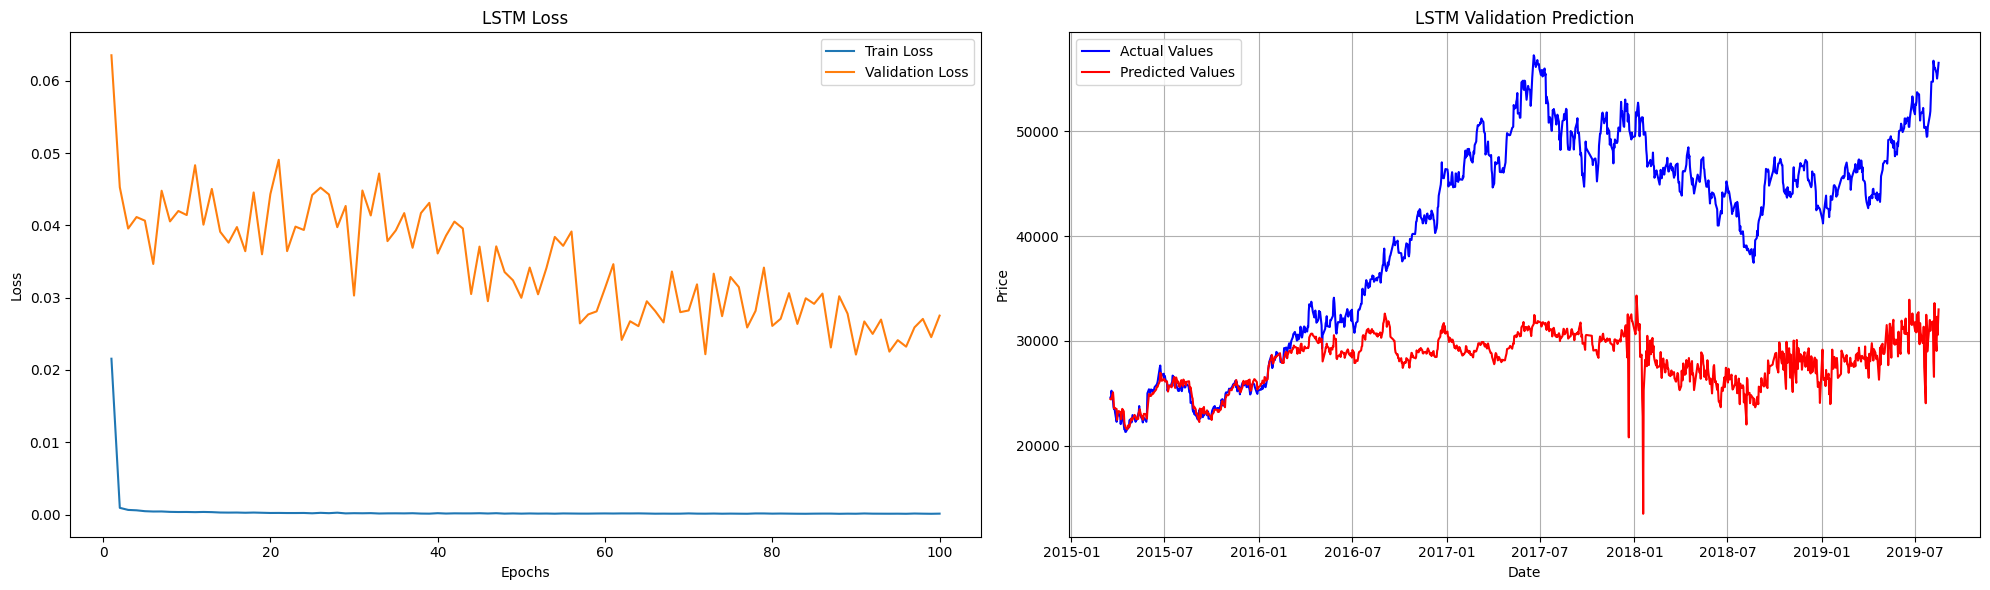

In [ ]:
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(x_val_int_wo_scaling, y_val_int_wo_scaling, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper1.predict(X_val) # 여기 모델 이름 바꾸기
a,b = y_val, y_pred
y_pred = y_scaler_int_wo_scaling.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_int_wo_scaling.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

Before Inverse Scaling
MAE: 12380.1701
MSE: 223398953.8529
RMSE: 14946.5365
R²: -1.2706
--------------------
After Inverse Scaling
MAE: 0.1390
MSE: 0.0275
RMSE: 0.1659
R²: -1.1392


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


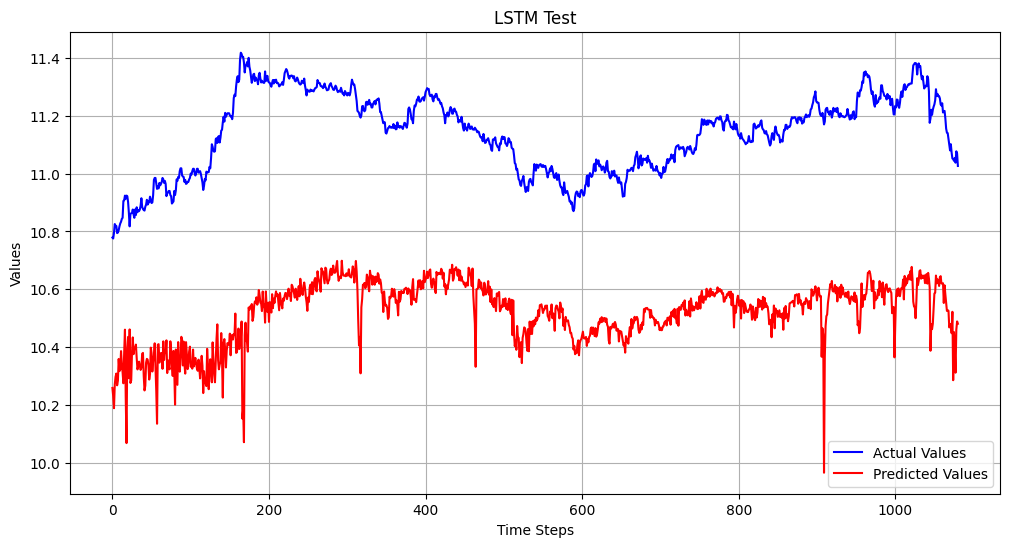

In [ ]:
X_test, y_test = create_sequences(x_test_int_wo_scaling, y_test_int_wo_scaling, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper1.predict(X_test) # 모델 이름 바꾸기
y_pred = y_scaler_int_wo_scaling.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_int_wo_scaling.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

#### Feature Selection

##### 2

In [55]:
wandb.finish()

In [56]:
wandb.init(project="LSTM No Out Scaling - Int", name="hyper2", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [128, 64],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/noOut_Int_hyper2.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int_wo_scaling, selected_y_train_int_wo_scaling, time_steps)
X_val, y_val = create_sequences(selected_x_val_int_wo_scaling, selected_y_val_int_wo_scaling, time_steps)

model_int_hyper2 = tf.keras.Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(time_steps, len(features4_int))),
    MaxPooling1D(pool_size=2),

    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True), # 여기 feature 바꾸는거 잊지 말기.
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),

    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

optimizer = Adam(learning_rate=0.0005)
model_int_hyper2.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper2.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_int_hyper2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0535 - mse: 0.0535 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 7.0613e-04 - mse: 7.0613e-04 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.9462e-04 - mse: 5.9462e-04 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.7169e-04 - mse: 4.7169e-04 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.3577e-04 - mse: 4.3577e-04 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.1363e-04 - mse: 4.1363e-04 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.9096e-04 - mse: 3.9096e-04 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 4.0346e-04 - mse: 4.0346e-04 - val_loss: 0.0053 - val_mse:

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)                    │ (None, 88, 64)              │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 44, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 44, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 466,757 (1.78 MB)

 Trainable params: 155,585 (607.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 311,172 (1.19 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


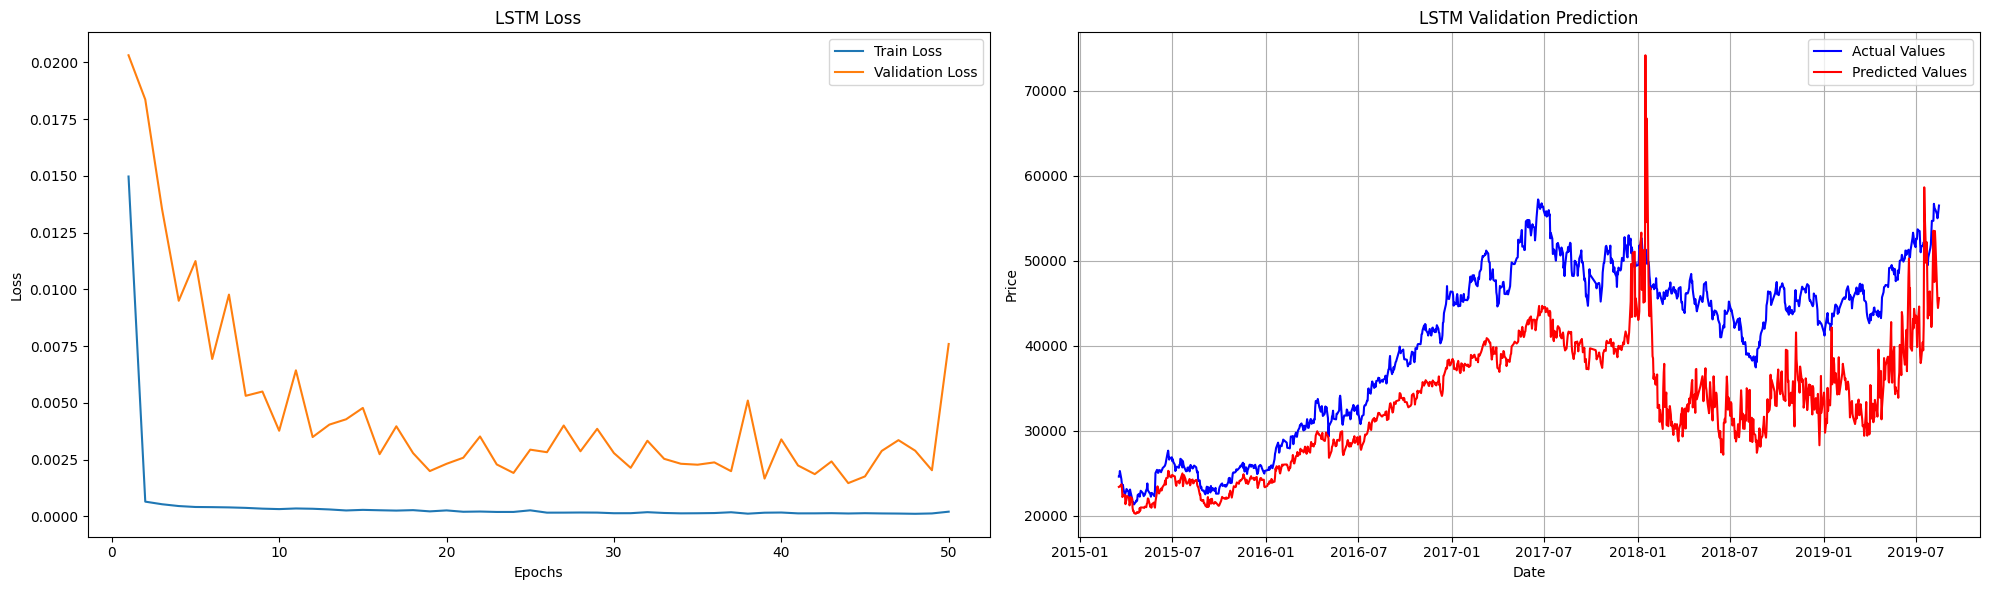

Before Inverse Scaling
MAE: 7247.0762
MSE: 71640866.6820
RMSE: 8464.0928
R²: 0.2719
--------------------
After Inverse Scaling
MAE: 0.0767
MSE: 0.0076
RMSE: 0.0872
R²: 0.4092
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


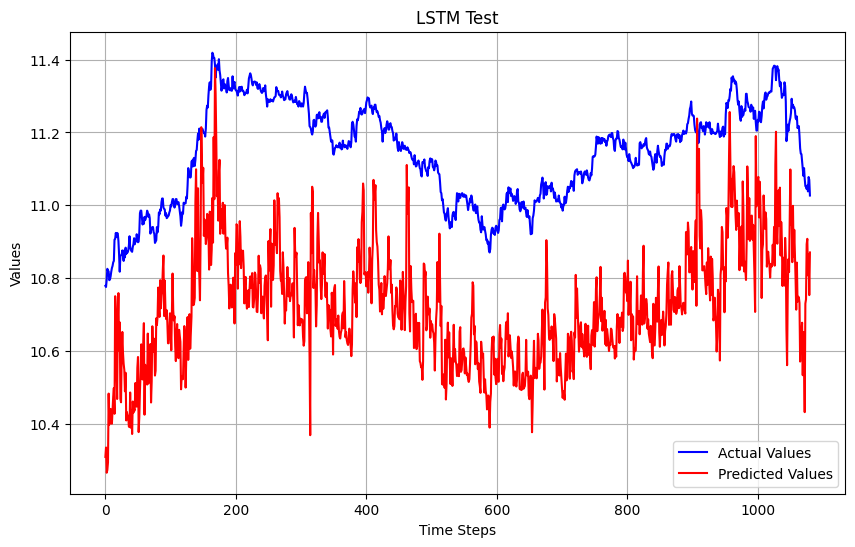

In [58]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int_wo_scaling, selected_y_val_int_wo_scaling, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper2.predict(X_val) # 여기 모델 이름 바꾸기
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_wo_scaling.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_int_wo_scaling.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int_wo_scaling, selected_y_test_int_wo_scaling, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper2.predict(X_test) # 모델 이름 바꾸기
y_pred = y_scaler_selected_int_wo_scaling.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_wo_scaling.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
wandb.finish()

##### 3

In [60]:
wandb.init(project="LSTM No Out Scaling - Int", name="hyper3", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [64,32],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/noOut_Int_hyper3.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int_wo_scaling, selected_y_train_int_wo_scaling, time_steps)
X_val, y_val = create_sequences(selected_x_val_int_wo_scaling, selected_y_val_int_wo_scaling, time_steps)

model_int_hyper3 = tf.keras.Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=(time_steps, len(features4_int))),
    MaxPooling1D(pool_size=2),

    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001), return_sequences=True), # 여기 feature 바꾸는거 잊지 말기.
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),

    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)
])

optimizer = Adam(learning_rate=0.0005)
model_int_hyper3.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper3.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_int_hyper3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.2037 - mse: 0.1101 - val_loss: 0.1169 - val_mse: 0.0454
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0673 - mse: 0.0018 - val_loss: 0.0785 - val_mse: 0.0289
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0469 - mse: 0.0014 - val_loss: 0.0588 - val_mse: 0.0238
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0335 - mse: 0.0011 - val_loss: 0.0423 - val_mse: 0.0167
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0248 - mse: 9.2936e-04 - val_loss: 0.0354 - val_mse: 0.0160
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0191 - mse: 9.0246e-04 - val_loss: 0.0268 - val_mse: 0.0115
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0153 - mse: 8.1416e-04 - val_loss: 0.0179 - val_mse: 0.0055
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0127 - mse: 8.2537e-04 - val_loss: 0.0164 - val_mse: 0.0060
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)                    │ (None, 86, 64)              │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 43, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 43, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 43, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 180,101 (703.52 KB)

 Trainable params: 60,033 (234.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 120,068 (469.02 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


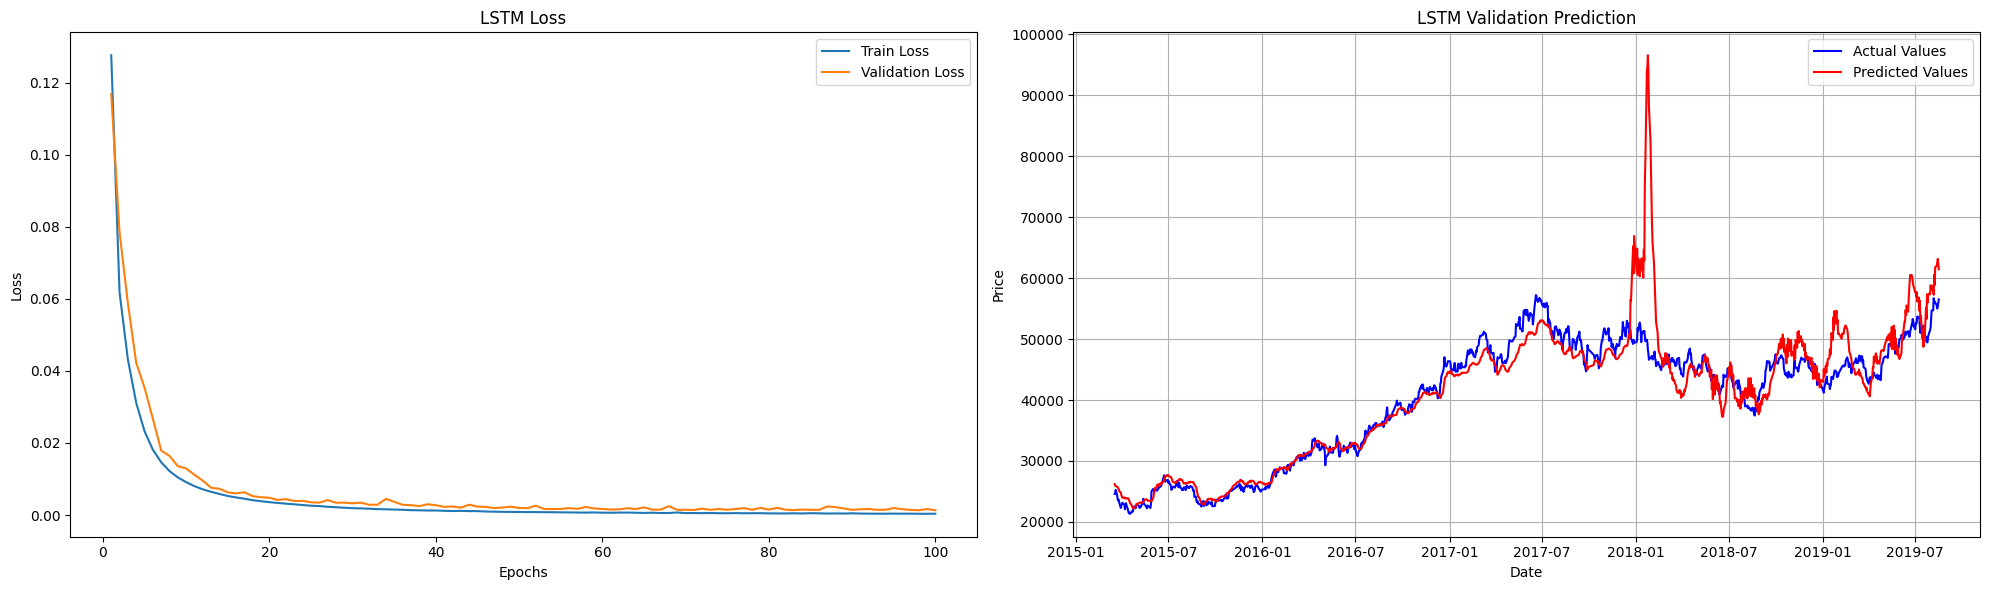

Before Inverse Scaling
MAE: 2396.0452
MSE: 23100105.4947
RMSE: 4806.2569
R²: 0.7652
--------------------
After Inverse Scaling
MAE: 0.0214
MSE: 0.0012
RMSE: 0.0348
R²: 0.9057
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


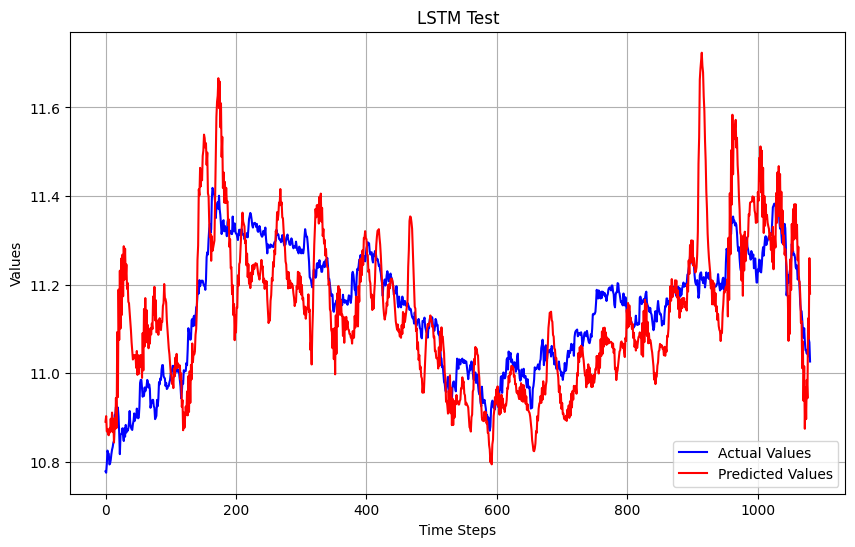

In [61]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int_wo_scaling, selected_y_val_int_wo_scaling, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper3.predict(X_val) # 여기 모델 이름 바꾸기
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_wo_scaling.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_int_wo_scaling.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int_wo_scaling, selected_y_test_int_wo_scaling, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper3.predict(X_test) # 모델 이름 바꾸기
y_pred = y_scaler_selected_int_wo_scaling.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_wo_scaling.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
wandb.finish()

##### 4

In [66]:
wandb.finish()

In [67]:
wandb.init(project="LSTM No Out Scaling - Int", name="hyper4", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [64,32],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/noOut_Int_hyper4.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int_wo_scaling, selected_y_train_int_wo_scaling, time_steps)
X_val, y_val = create_sequences(selected_x_val_int_wo_scaling, selected_y_val_int_wo_scaling, time_steps)

model_int_hyper4 = tf.keras.Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=(time_steps, len(features4_int))),
    MaxPooling1D(pool_size=2),

    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.003), return_sequences=True), # 여기 feature 바꾸는거 잊지 말기.
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),

    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)
])

optimizer = Adam(learning_rate=0.0001)
model_int_hyper4.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper4.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_int_hyper4.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.6079 - mse: 0.2239 - val_loss: 0.4621 - val_mse: 0.0991
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.3673 - mse: 0.0114 - val_loss: 0.3689 - val_mse: 0.0339
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.3293 - mse: 0.0012 - val_loss: 0.3371 - val_mse: 0.0293
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.3025 - mse: 0.0011 - val_loss: 0.3068 - val_mse: 0.0243
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2776 - mse: 0.0011 - val_loss: 0.2825 - val_mse: 0.0233
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2547 - mse: 0.0011 - val_loss: 0.2591 - val_mse: 0.0215
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2336 - mse: 0.0010 - val_loss: 0.2371 - val_mse: 0.0193
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2140 - mse: 9.4350e-04 - val_loss: 0.2169 - val_mse: 0.0174
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step 

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)                   │ (None, 86, 64)              │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 43, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_25 (LSTM)                       │ (None, 43, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_26 (LSTM)                       │ (None, 43, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_27 (LSTM)                       │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 180,101 (703.52 KB)

 Trainable params: 60,033 (234.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 120,068 (469.02 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


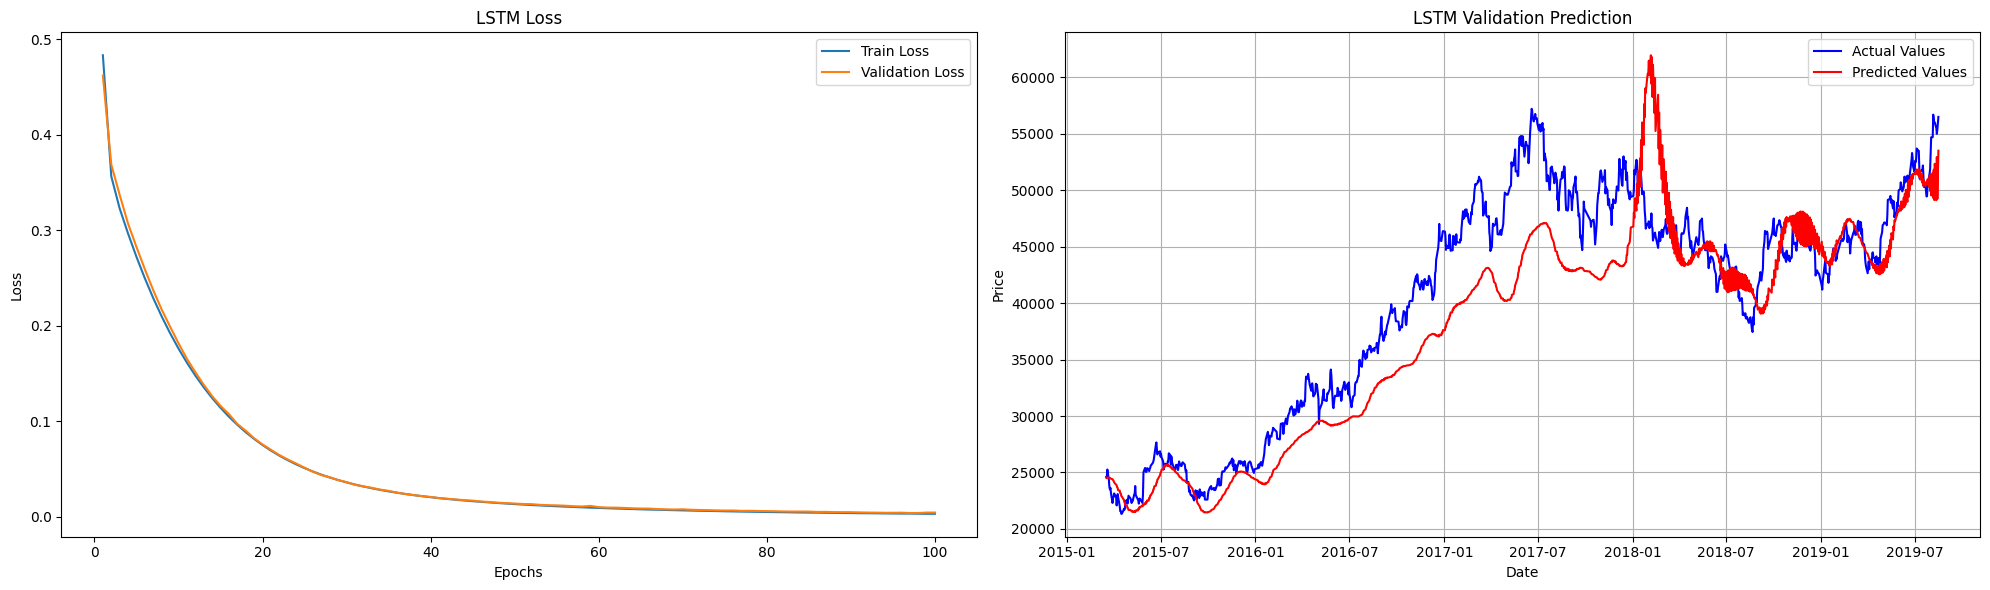

Before Inverse Scaling
MAE: 3563.2301
MSE: 21184738.7906
RMSE: 4602.6882
R²: 0.7847
--------------------
After Inverse Scaling
MAE: 0.0365
MSE: 0.0020
RMSE: 0.0443
R²: 0.8476
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


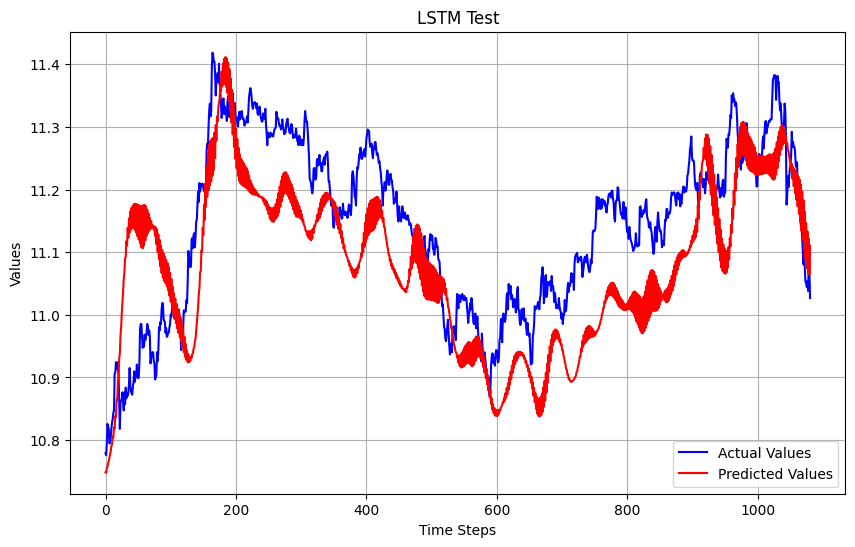

In [68]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int_wo_scaling, selected_y_val_int_wo_scaling, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper4.predict(X_val) # 여기 모델 이름 바꾸기
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_wo_scaling.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_int_wo_scaling.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int_wo_scaling, selected_y_test_int_wo_scaling, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper4.predict(X_test) # 모델 이름 바꾸기
y_pred = y_scaler_selected_int_wo_scaling.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_wo_scaling.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
wandb.finish()

##### 5

In [70]:
wandb.init(project="LSTM No Out Scaling - Int", name="hyper5", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [64,32],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/noOut_Int_hyper5.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int_wo_scaling, selected_y_train_int_wo_scaling, time_steps)
X_val, y_val = create_sequences(selected_x_val_int_wo_scaling, selected_y_val_int_wo_scaling, time_steps)

model_int_hyper5 = tf.keras.Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=(time_steps, len(features4_int))),
    MaxPooling1D(pool_size=2),

    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.002), return_sequences=True)), # 여기 feature 바꾸는거 잊지 말기.
    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001))),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),

    Attention(),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)
])

optimizer = Adam(learning_rate=0.0001)
model_int_hyper5.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper5.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_int_hyper5.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - loss: 0.7102 - mse: 0.0586 - val_loss: 0.6724 - val_mse: 0.0588
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.6031 - mse: 0.0024 - val_loss: 0.5854 - val_mse: 0.0233
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.5507 - mse: 9.9617e-04 - val_loss: 0.5313 - val_mse: 0.0179
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.5027 - mse: 7.8387e-04 - val_loss: 0.4848 - val_mse: 0.0165
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.4583 - mse: 7.2043e-04 - val_loss: 0.4422 - val_mse: 0.0158
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.4173 - mse: 6.7713e-04 - val_loss: 0.4022 - val_mse: 0.0142
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.3796 - mse: 6.2006e-04 - val_loss: 0.3671 - val_mse: 0.0145
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.3449 - mse: 5.6633e-04 - val_loss: 0.3336 - val_mse: 0.0133
Epoch 9/100
54/54 ━━━━━━━━━━━━

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_11 (Conv1D)                   │ (None, 86, 64)              │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ (None, 43, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 43, 128)             │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 43, 64)              │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_30 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_3 (Attention)              │ (None)                      │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 378,149 (1.44 MB)

 Trainable params: 126,049 (492.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 252,100 (984.77 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


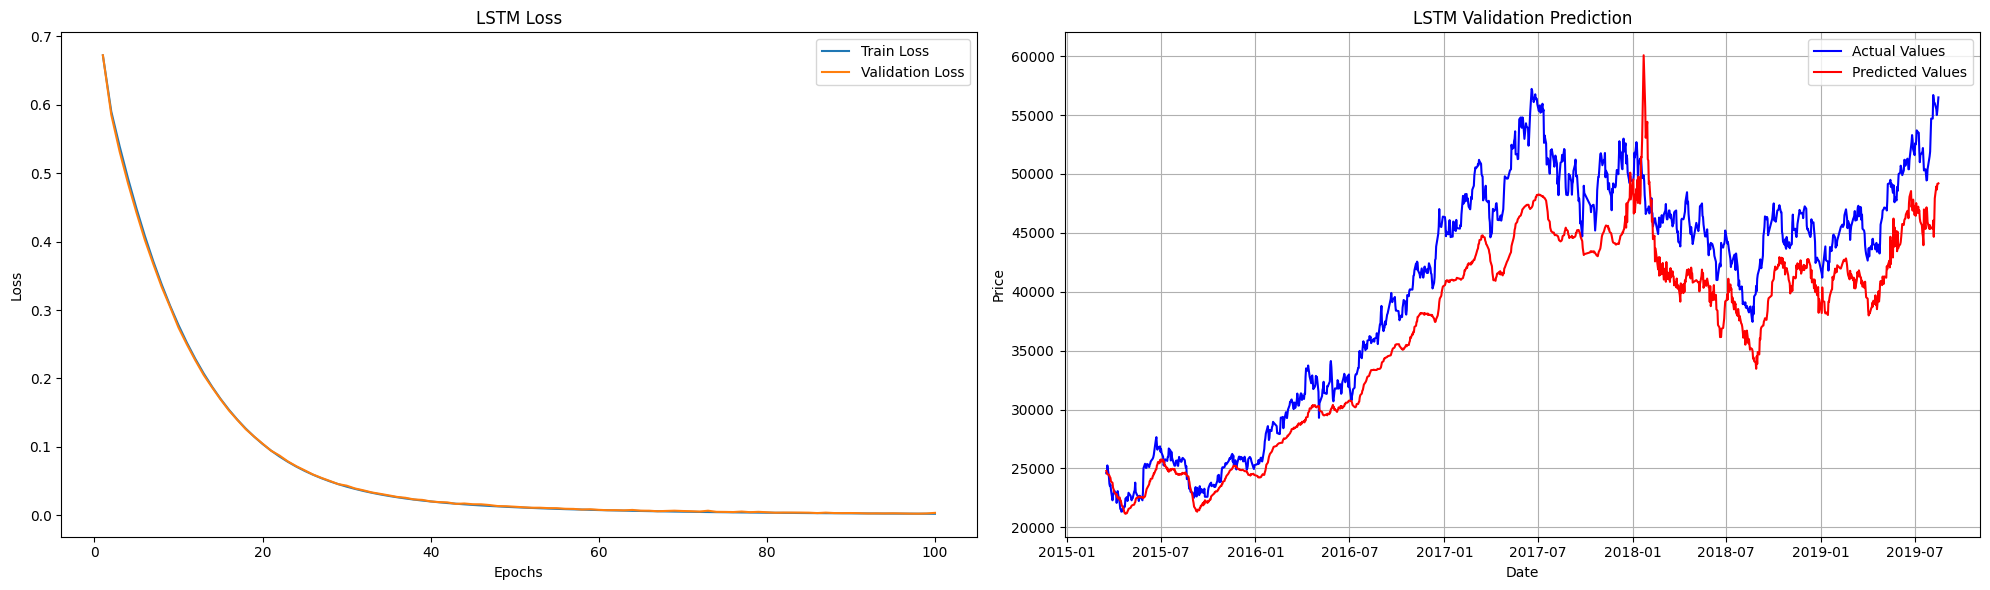

Before Inverse Scaling
MAE: 3694.3614
MSE: 18453462.8003
RMSE: 4295.7494
R²: 0.8124
--------------------
After Inverse Scaling
MAE: 0.0370
MSE: 0.0017
RMSE: 0.0409
R²: 0.8697
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


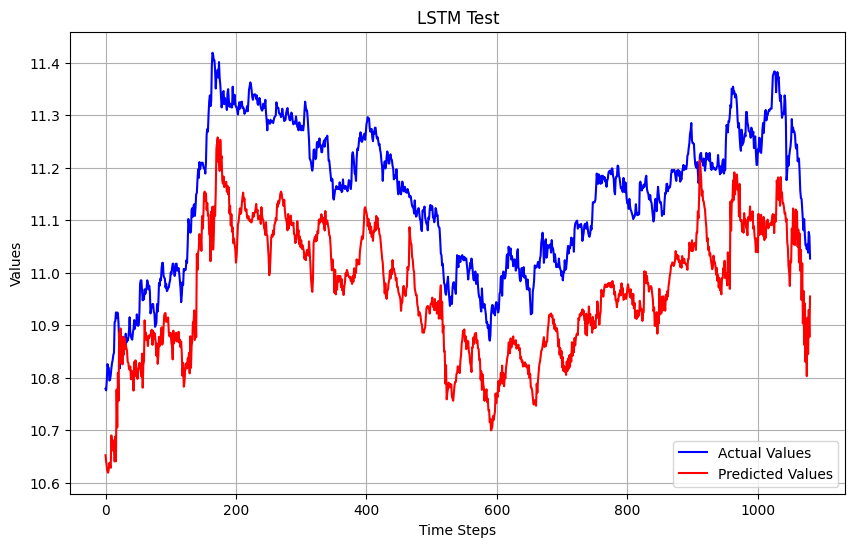

In [71]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int_wo_scaling, selected_y_val_int_wo_scaling, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper5.predict(X_val) # 여기 모델 이름 바꾸기
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_wo_scaling.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_int_wo_scaling.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int_wo_scaling, selected_y_test_int_wo_scaling, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper5.predict(X_test) # 모델 이름 바꾸기
y_pred = y_scaler_selected_int_wo_scaling.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_wo_scaling.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
wandb.finish()

##### 6

In [73]:
wandb.init(project="LSTM No Out Scaling - Int", name="hyper6", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [64,32],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/noOut_Int_hyper6.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int_wo_scaling, selected_y_train_int_wo_scaling, time_steps)
X_val, y_val = create_sequences(selected_x_val_int_wo_scaling, selected_y_val_int_wo_scaling, time_steps)

inputs = Input(shape=(time_steps, len(features4_int)))

# Conv1D와 MaxPooling
x = Conv1D(64, kernel_size=5, activation='relu')(inputs)
x = MaxPooling1D(pool_size=2)(x)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh',
             kernel_regularizer=tf.keras.regularizers.l2(0.002),
             return_sequences=True)(x)

# Skip Connection 1
lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001), return_sequences=True)(lstm1)

# 차원 맞추기
lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)

# Add 레이어 적용
skip1 = Add()([lstm1, lstm2_adjusted])

# LSTM 층 - 두 번째 LSTM
lstm3 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip1)

# Dense Layers
dense1 = Dense(32, activation='relu')(lstm3)
outputs = Dense(1)(dense1)

# 모델 정의
model_int_hyper6 = Model(inputs=inputs, outputs=outputs)
optimizer = Adam(learning_rate=0.0001)
model_int_hyper6.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper6.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_int_hyper6.summary()

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.5286 - mse: 0.2402 - val_loss: 0.3408 - val_mse: 0.0649
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2788 - mse: 0.0072 - val_loss: 0.2814 - val_mse: 0.0230
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2564 - mse: 0.0023 - val_loss: 0.2595 - val_mse: 0.0182
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2389 - mse: 0.0018 - val_loss: 0.2400 - val_mse: 0.0151
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2224 - mse: 0.0014 - val_loss: 0.2226 - val_mse: 0.0130
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.2071 - mse: 0.0012 - val_loss: 0.2068 - val_mse: 0.0117
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1927 - mse: 0.0011 - val_loss: 0.1928 - val_mse: 0.0112
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1793 - mse: 9.2836e-04 - val_loss: 0.1797 - val_mse: 0.0107
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step 

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 90, 16)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_12 (Conv1D)        │ (None, 86, 64)         │          5,184 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_12          │ (None, 43, 64)         │              0 │ conv1d_12[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_31 (LSTM)            │ (None, 43, 64)         │         33,024 │ max_pooling1d_12[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_32 (LSTM)            │ (None, 43, 32)         │         12,416 │ lstm_31[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_19 (Dense)          │ (None, 43, 64)         │          2,112 │ lstm_32[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 43, 64)         │              0 │ lstm_31[0][0],         │
│                           │                        │                │ dense_19[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_33 (LSTM)            │ (None, 32)             │         12,416 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_20 (Dense)          │ (None, 32)             │          1,056 │ lstm_33[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_21 (Dense)          │ (None, 1)              │             33 │ dense_20[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 198,725 (776.27 KB)

 Trainable params: 66,241 (258.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132,484 (517.52 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


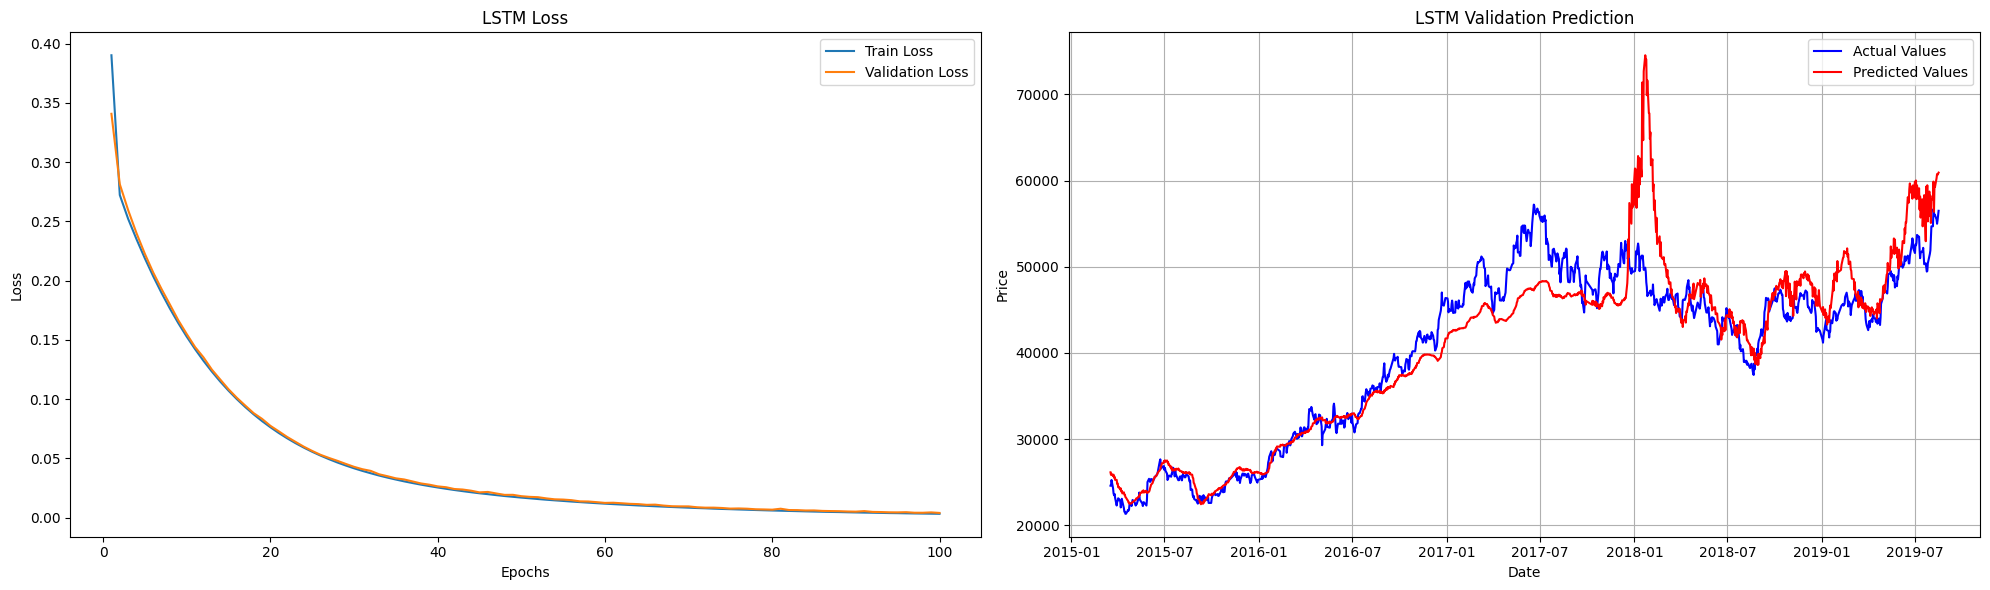

Before Inverse Scaling
MAE: 2663.8236
MSE: 16679634.6690
RMSE: 4084.0708
R²: 0.8305
--------------------
After Inverse Scaling
MAE: 0.0242
MSE: 0.0011
RMSE: 0.0332
R²: 0.9141
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


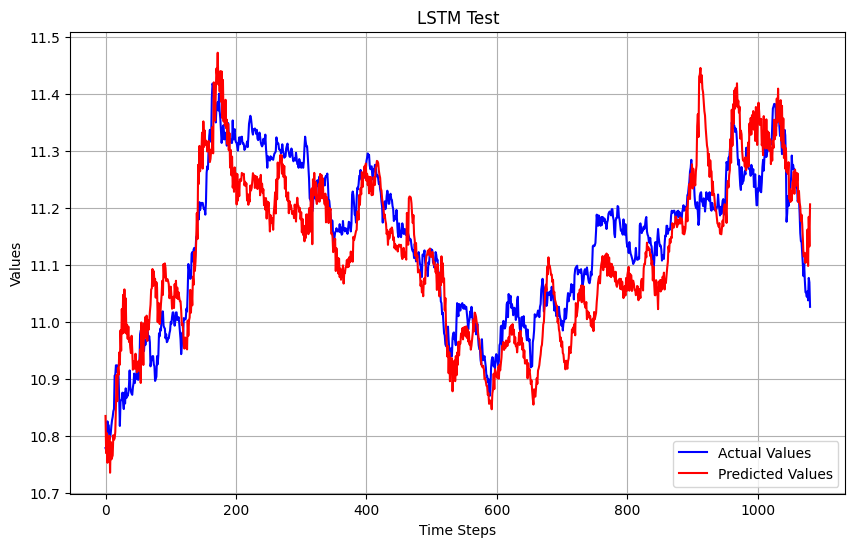

In [74]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int_wo_scaling, selected_y_val_int_wo_scaling, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper6.predict(X_val) # 여기 모델 이름 바꾸기
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_wo_scaling.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_int_wo_scaling.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int_wo_scaling, selected_y_test_int_wo_scaling, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper6.predict(X_test) # 모델 이름 바꾸기
y_pred = y_scaler_selected_int_wo_scaling.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_wo_scaling.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
wandb.finish()

##### 7

In [76]:
wandb.init(project="LSTM No Out Scaling - Int", name="hyper7", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [64,32],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/noOut_Int_hyper7.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int_wo_scaling, selected_y_train_int_wo_scaling, time_steps)
X_val, y_val = create_sequences(selected_x_val_int_wo_scaling, selected_y_val_int_wo_scaling, time_steps)

inputs = Input(shape=(time_steps, len(features4_int)))

# Conv1D와 MaxPooling
x = Conv1D(64, kernel_size=5, activation='relu')(inputs)
x = MaxPooling1D(pool_size=2)(x)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh',
             kernel_regularizer=tf.keras.regularizers.l2(0.002),
             return_sequences=True)(x)

# Skip Connection 1
lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.002), return_sequences=True)(lstm1)

# 차원 맞추기
lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)

# Add 레이어 적용
skip1 = Add()([lstm1, lstm2_adjusted])

# LSTM 층 - 두 번째 LSTM
lstm3 = LSTM(wandb.config.lstm_units[1], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.002))(skip1)

# Dense Layers
dense1 = Dense(32, activation='relu')(lstm3)
outputs = Dense(1)(dense1)

# 모델 정의
model_int_hyper7 = Model(inputs=inputs, outputs=outputs)
optimizer = Adam(learning_rate=0.0001)
model_int_hyper7.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper7.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_int_hyper7.summary()

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 0.6270 - mse: 0.0849 - val_loss: 0.5920 - val_mse: 0.0732
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.5120 - mse: 0.0015 - val_loss: 0.5575 - val_mse: 0.0722
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.4782 - mse: 0.0011 - val_loss: 0.5161 - val_mse: 0.0635
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.4456 - mse: 9.2642e-04 - val_loss: 0.4778 - val_mse: 0.0566
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.4145 - mse: 8.3820e-04 - val_loss: 0.4429 - val_mse: 0.0514
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.3851 - mse: 7.5682e-04 - val_loss: 0.4067 - val_mse: 0.0433
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.3575 - mse: 7.6487e-04 - val_loss: 0.3768 - val_mse: 0.0397
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.3315 - mse: 6.8538e-04 - val_loss: 0.3514 - val_mse: 0.0389
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11            │ (None, 90, 16)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_13 (Conv1D)        │ (None, 86, 64)         │          5,184 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_13          │ (None, 43, 64)         │              0 │ conv1d_13[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_34 (LSTM)            │ (None, 43, 64)         │         33,024 │ max_pooling1d_13[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_35 (LSTM)            │ (None, 43, 32)         │         12,416 │ lstm_34[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_22 (Dense)          │ (None, 43, 64)         │          2,112 │ lstm_35[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 43, 64)         │              0 │ lstm_34[0][0],         │
│                           │                        │                │ dense_22[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_36 (LSTM)            │ (None, 32)             │         12,416 │ add_3[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_23 (Dense)          │ (None, 32)             │          1,056 │ lstm_36[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_24 (Dense)          │ (None, 1)              │             33 │ dense_23[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 198,725 (776.27 KB)

 Trainable params: 66,241 (258.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132,484 (517.52 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


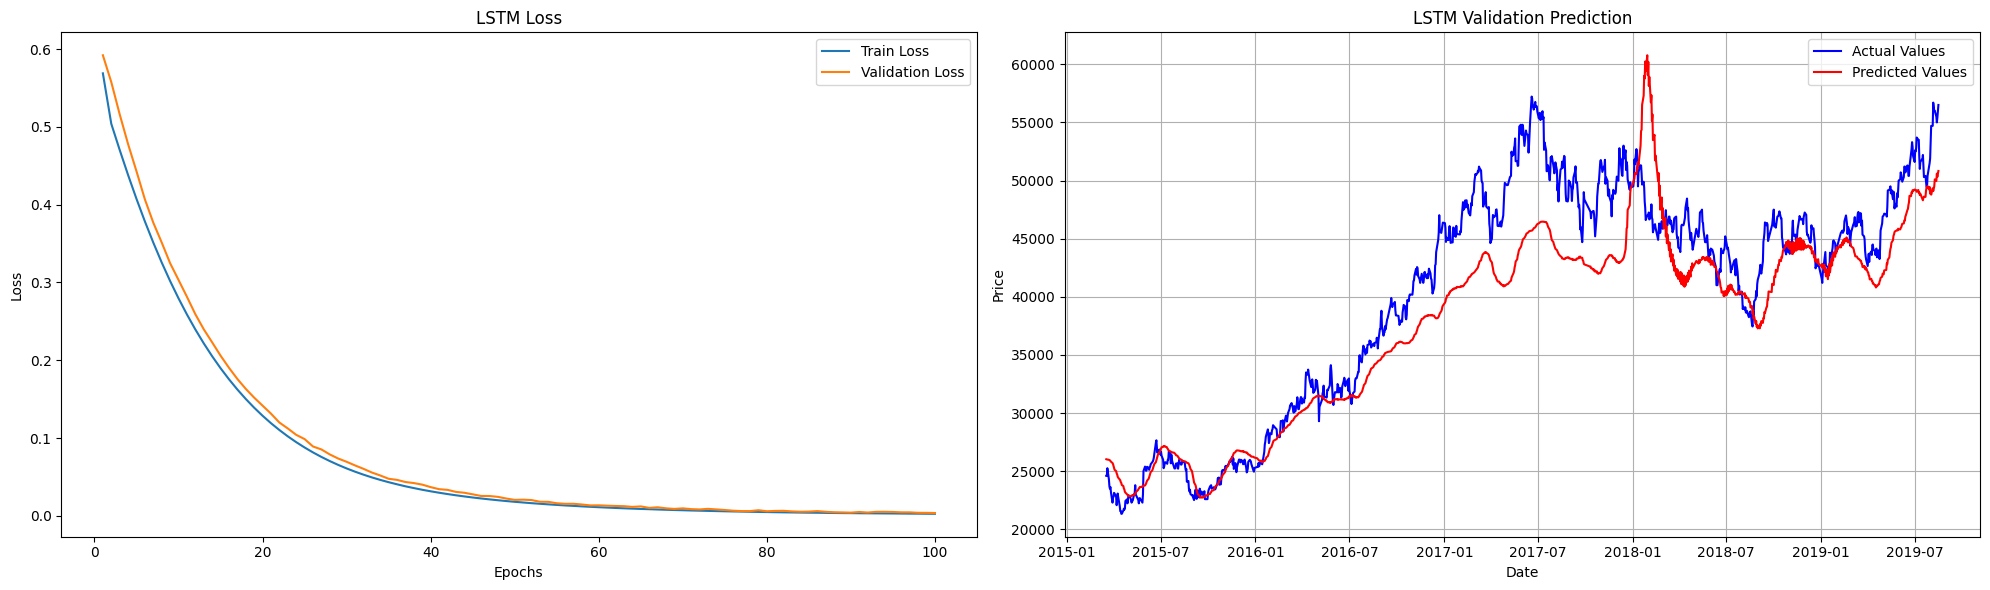

Before Inverse Scaling
MAE: 3192.7674
MSE: 17804742.9738
RMSE: 4219.5667
R²: 0.8190
--------------------
After Inverse Scaling
MAE: 0.0310
MSE: 0.0015
RMSE: 0.0386
R²: 0.8841
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


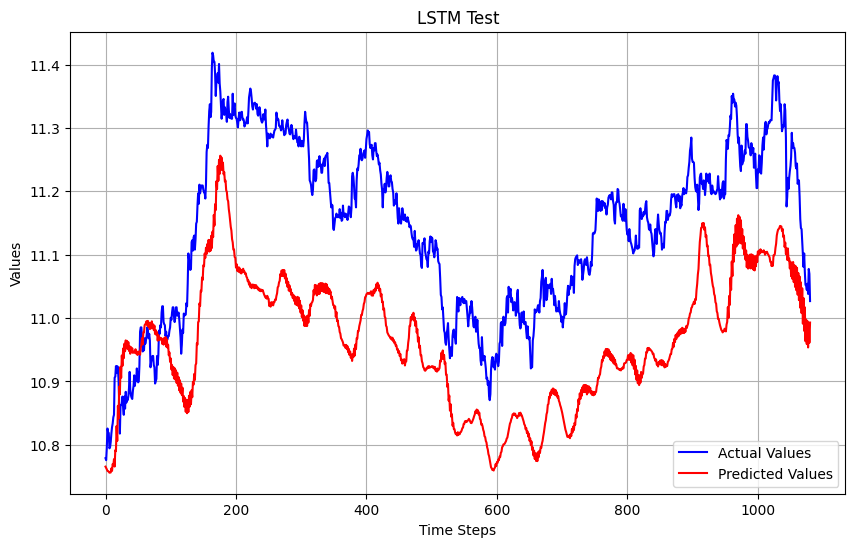

In [77]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int_wo_scaling, selected_y_val_int_wo_scaling, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper7.predict(X_val) # 여기 모델 이름 바꾸기
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_wo_scaling.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_int_wo_scaling.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int_wo_scaling, selected_y_test_int_wo_scaling, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper7.predict(X_test) # 모델 이름 바꾸기
y_pred = y_scaler_selected_int_wo_scaling.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_wo_scaling.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()